# Seatle Airbnb House Price analysis

This project focuses on the house price of Airbnb in Seatle. I downloaded the data from Kaggle(https://www.kaggle.com/airbnb/seattle). The airbnb also provides their data to the public including many cities(http://insideairbnb.com/get-the-data.html). The questions I try to answer here are 
1) What is the main factors that affect the house price?
2) The predition of the house price. 

First, let's read in the data and necessary library.

In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython import display
%matplotlib inline

df_listing = pd.read_csv(r"C:\Users\YiChen\Downloads\new study\udacity\blog post and github\seattle\listings.csv")
df_calendar = pd.read_csv(r'C:\Users\YiChen\Downloads\new study\udacity\blog post and github\seattle\calendar.csv')
df_review = pd.read_csv(r'C:\Users\YiChen\Downloads\new study\udacity\blog post and github\seattle\reviews.csv')
df_listing.head()


id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview        ...         \
0                                                NaN        ...          
1  Queen Anne is a wonderful, truly functional vi...        ...          
2  Upper Queen Anne is a charming neighborhood fu...        ...          
3                                                NaN        ...          
4  We are in the beautiful neighborhood of Queen ...        ...          

  review_scores_value requires_license license jurisdiction_names  \
0                10.0                f     NaN         WASHINGTON   
1                10.0                f     NaN         WASHINGTON   
2                10.0                f     NaN         WASHINGTON   
3                 NaN                f     NaN         WASHINGTON   
4                 9.0                f     NaN         WASHINGTON   

  instant_bookable cancellation_policy  require_guest_profile_picture  \
0                f            moderate                              f   
1                f              strict                              t   
2                f              strict                              f   
3                f            flexible                              f   
4                f              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [3]:
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [4]:
df_calendar.head()
 

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [5]:
df_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [6]:
df_review.head() 

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

In [7]:
df_review.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [8]:
df_listing.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [9]:
df_listing.isnull().mean().sort_values()

id                                  0.000000
price                               0.000000
amenities                           0.000000
bed_type                            0.000000
accommodates                        0.000000
room_type                           0.000000
is_location_exact                   0.000000
guests_included                     0.000000
longitude                           0.000000
country                             0.000000
country_code                        0.000000
smart_location                      0.000000
market                              0.000000
state                               0.000000
city                                0.000000
calculated_host_listings_count      0.000000
neighbourhood_group_cleansed        0.000000
extra_people                        0.000000
maximum_nights                      0.000000
require_guest_phone_verification    0.000000
require_guest_profile_picture       0.000000
cancellation_policy                 0.000000
instant_bo

In [10]:
price = df_listing[['price','weekly_price','monthly_price']]

In [11]:
price.isnull().mean()

price            0.000000
weekly_price     0.473808
monthly_price    0.602672
dtype: float64

I dropped the weekly_price and monthly_price, because of the data missing.
I also dropped other columns like website url, picture url and etc.

In [12]:
df_listing.isnull().mean()[df_listing.isnull().mean() >= 0].index

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

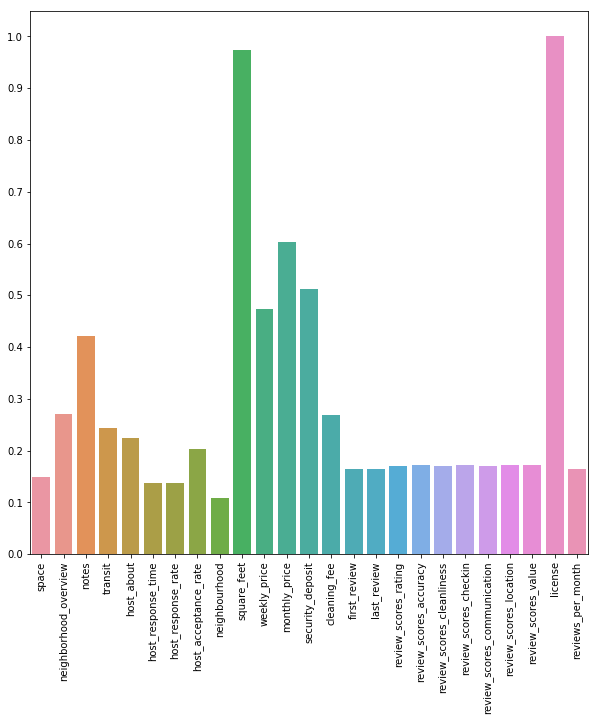

In [13]:
#draw the missing value counts(by mean)
plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,1.2,0.1))
sns.barplot(x = df_listing.isnull().mean()[df_listing.isnull().mean() >= 0.1 ].index, y = df_listing.isnull().mean()[df_listing.isnull().mean() >= 0.1 ].values)
plt.show()

In [14]:
df_listing['price'] = pd.to_numeric(df_listing['price'].apply(lambda x: str(x).replace('$','').replace(',','')),errors = 'coerce')

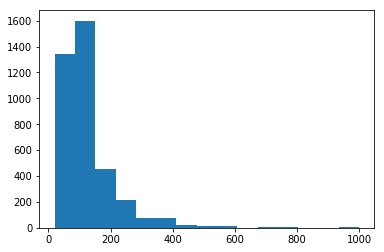

In [15]:
plt.hist(df_listing['price'],bins = 15)
plt.show()

We noticed that the price is mainly between $0 - $200.

### The price map

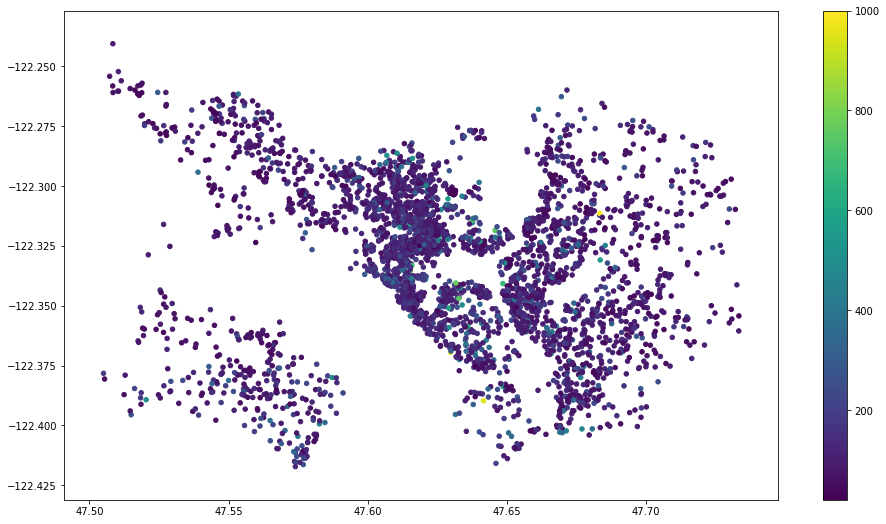

In [16]:
plt.figure(figsize = (16,9))
points = plt.scatter(df_listing['latitude'],df_listing['longitude'],c=df_listing['price'], s=20,cmap='viridis')
plt.colorbar(points)

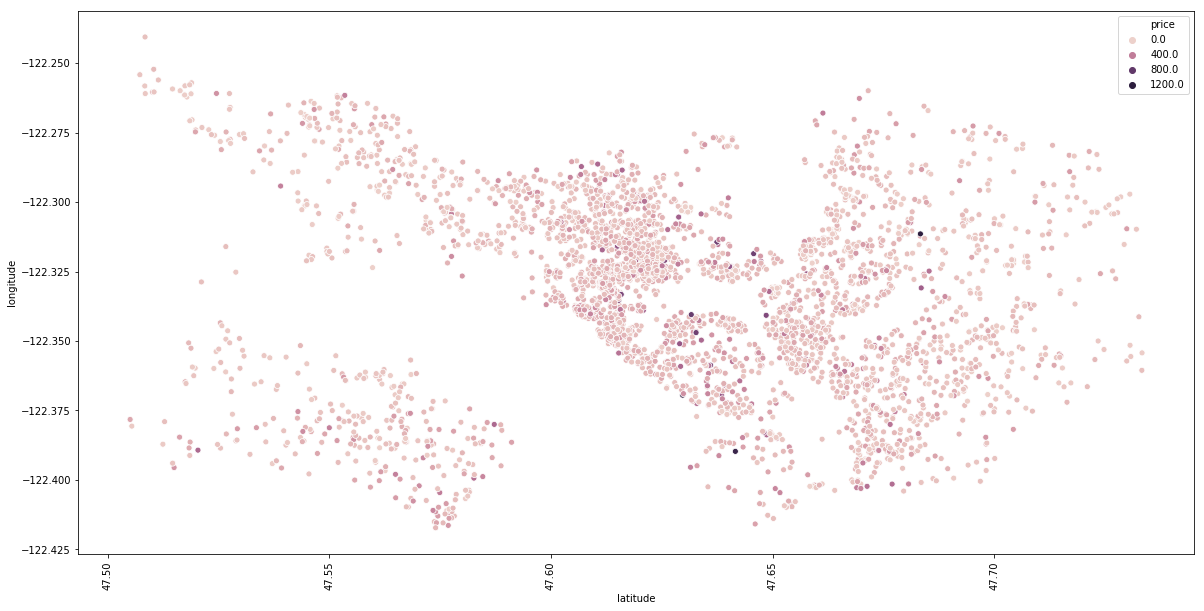

In [17]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue = 'price' , y ='longitude',data = df_listing)

The price map shows the center of city has more expensive rent.

In [18]:
df_list_new = df_listing[[  'host_response_time',
       'host_response_rate', 'host_is_superhost','host_identity_verified',
        'neighbourhood',  'city', 'state', 'zipcode', 'market',
        'country','is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities','price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365',  'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',  'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']]

In [19]:
cat_level=[ 'host_response_time',
       'host_response_rate', 'host_is_superhost','host_identity_verified',
        'neighbourhood',  'city', 'state', 'zipcode', 'market',
        'country','is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities','price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365',  'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',  'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']
[df_list_new[c].value_counts() for c in cat_level]

[within an hour        1692
 within a few hours     968
 within a day           597
 a few days or more      38
 Name: host_response_time, dtype: int64, 100%    2371
 90%      165
 80%      104
 99%       78
 88%       66
 50%       52
 94%       46
 67%       41
 75%       32
 89%       32
 86%       30
 96%       28
 98%       28
 70%       25
 97%       21
 83%       20
 60%       20
 93%       18
 92%       18
 33%       14
 40%       12
 63%       11
 95%        8
 71%        8
 78%        8
 91%        5
 43%        4
 76%        3
 64%        3
 25%        3
 87%        3
 82%        2
 17%        2
 57%        2
 58%        2
 65%        1
 69%        1
 55%        1
 30%        1
 68%        1
 56%        1
 31%        1
 81%        1
 38%        1
 53%        1
 Name: host_response_rate, dtype: int64, f    3038
 t     778
 Name: host_is_superhost, dtype: int64, t    2997
 f     819
 Name: host_identity_verified, dtype: int64, Capitol Hill                 351
 Ballard         

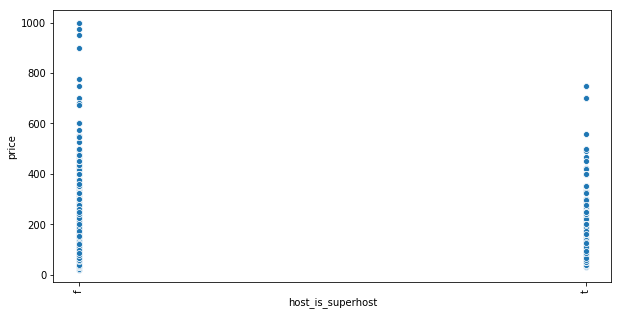

In [20]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'host_is_superhost', y = 'price',data = df_listing)

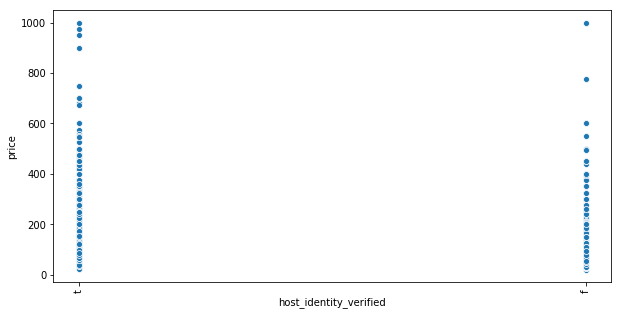

In [21]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'host_identity_verified', y = 'price',data = df_listing)

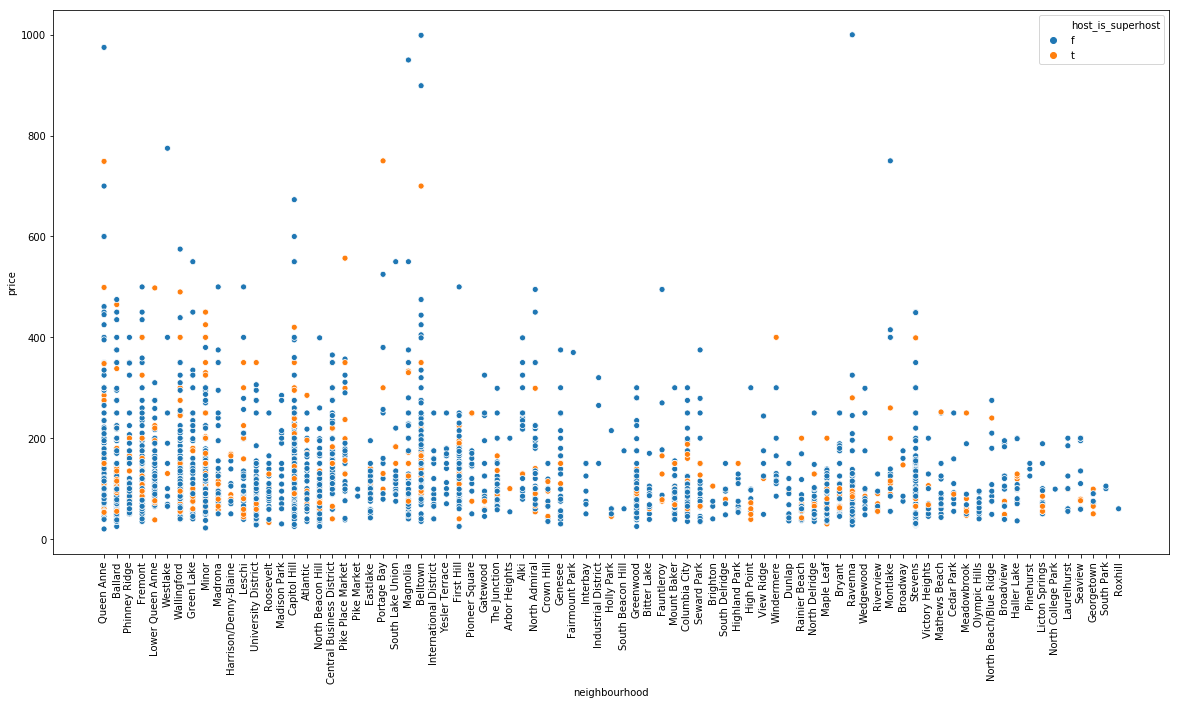

In [22]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'neighbourhood', hue = 'host_is_superhost',y = 'price',data = df_listing)

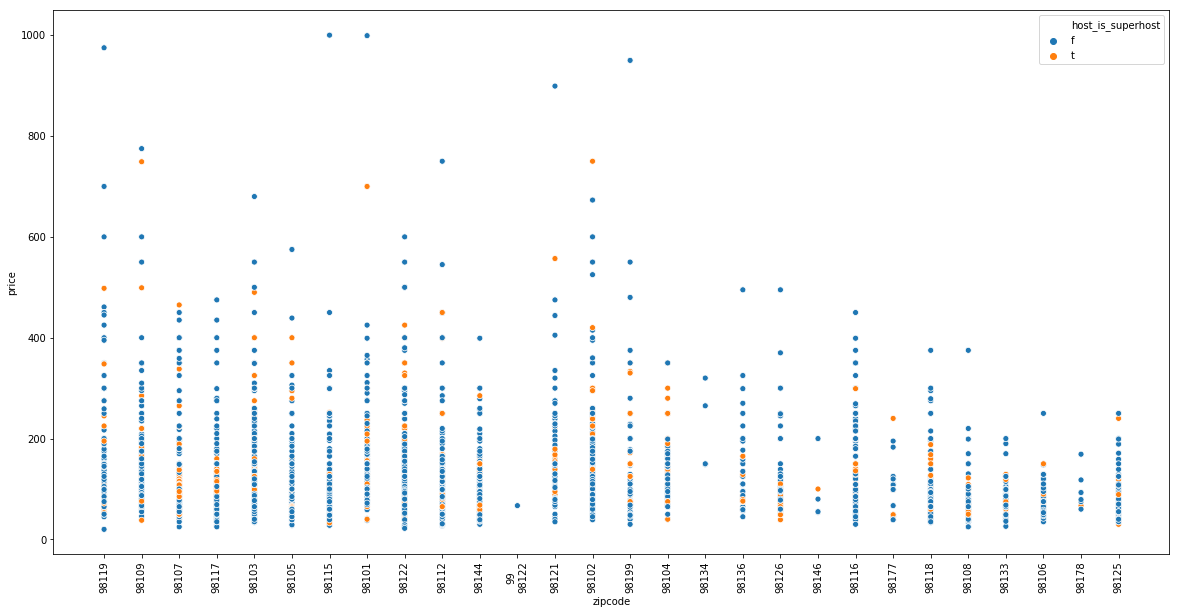

In [23]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'zipcode', hue = 'host_is_superhost',y = 'price',data = df_listing)

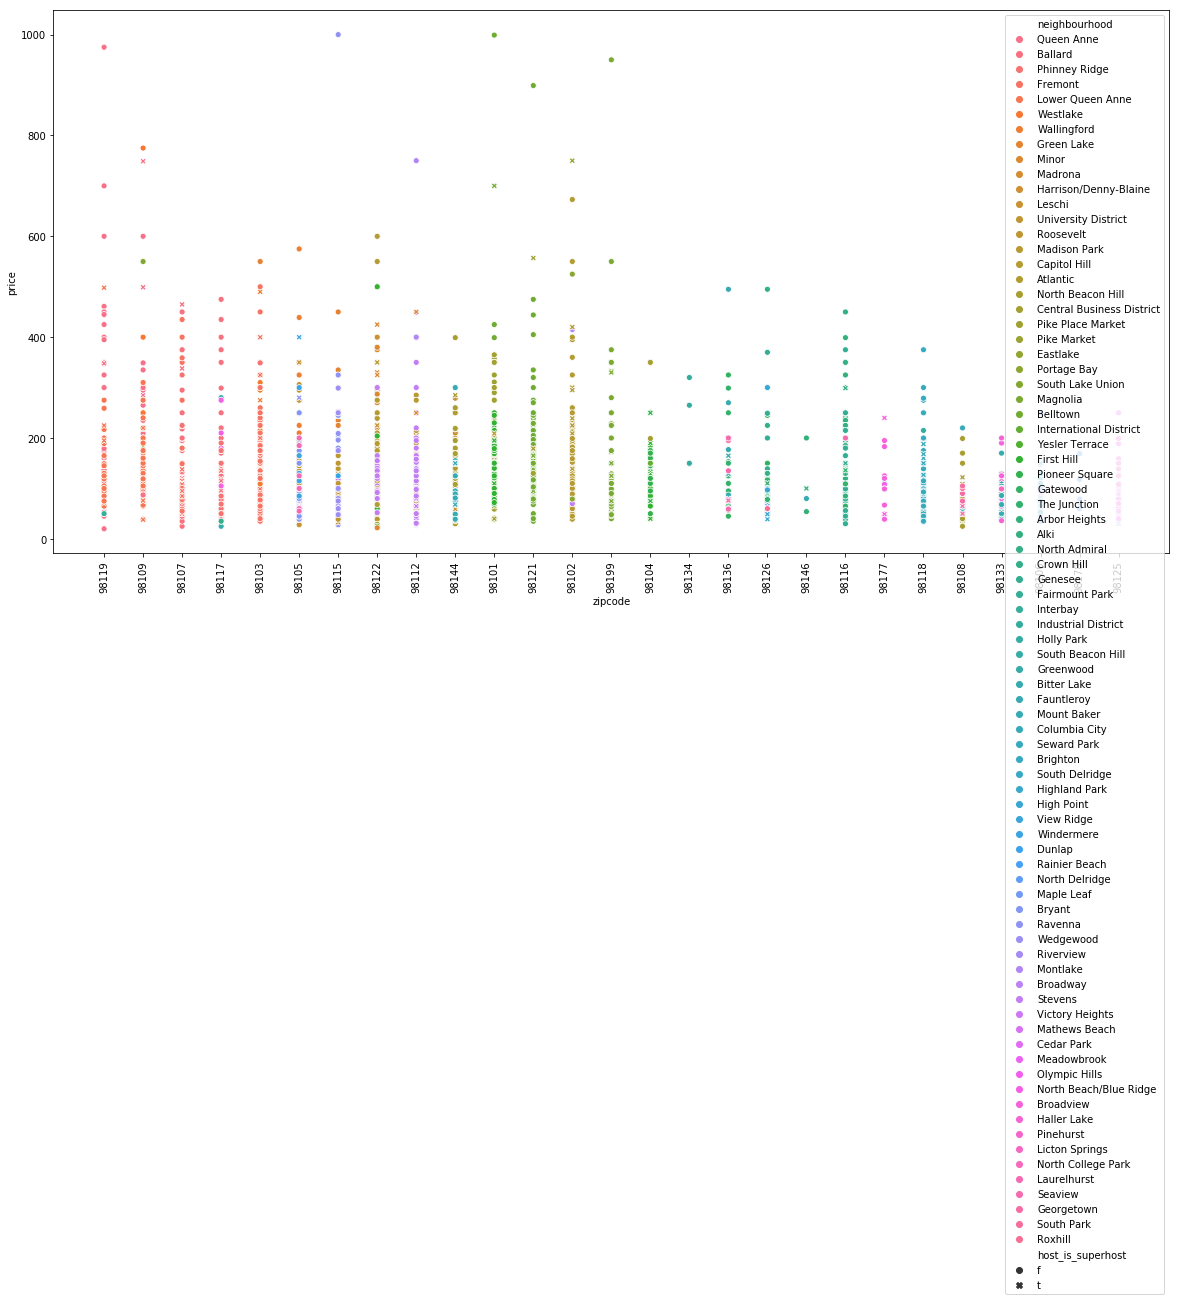

In [24]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'zipcode', hue = 'neighbourhood',style = 'host_is_superhost',y = 'price',data = df_listing)

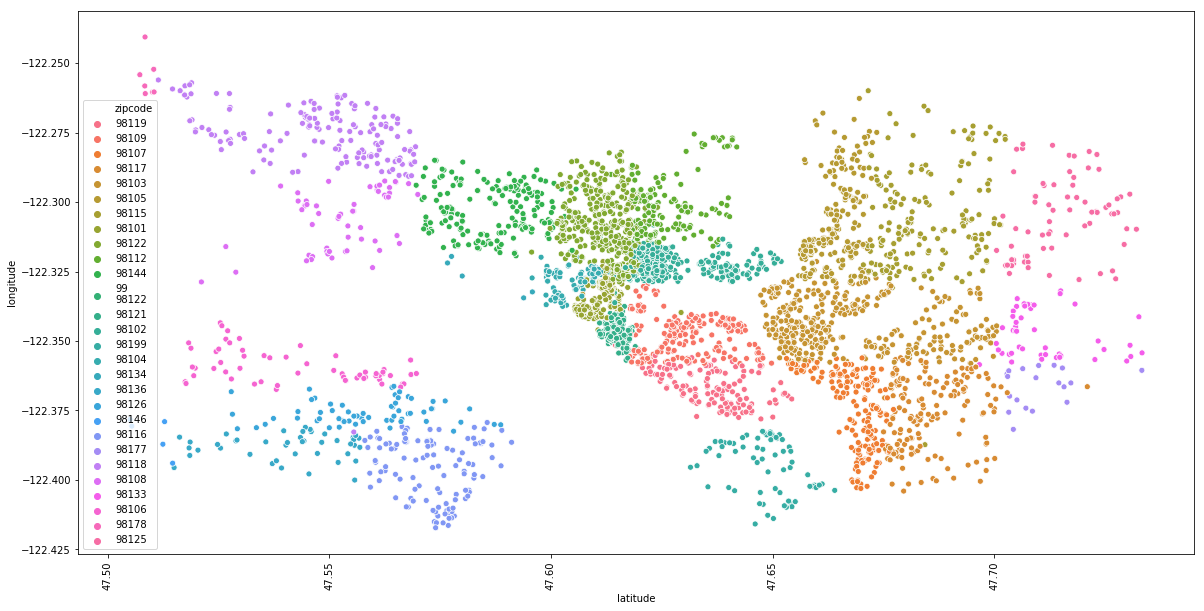

In [25]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue = 'zipcode' , y ='longitude',data = df_listing)

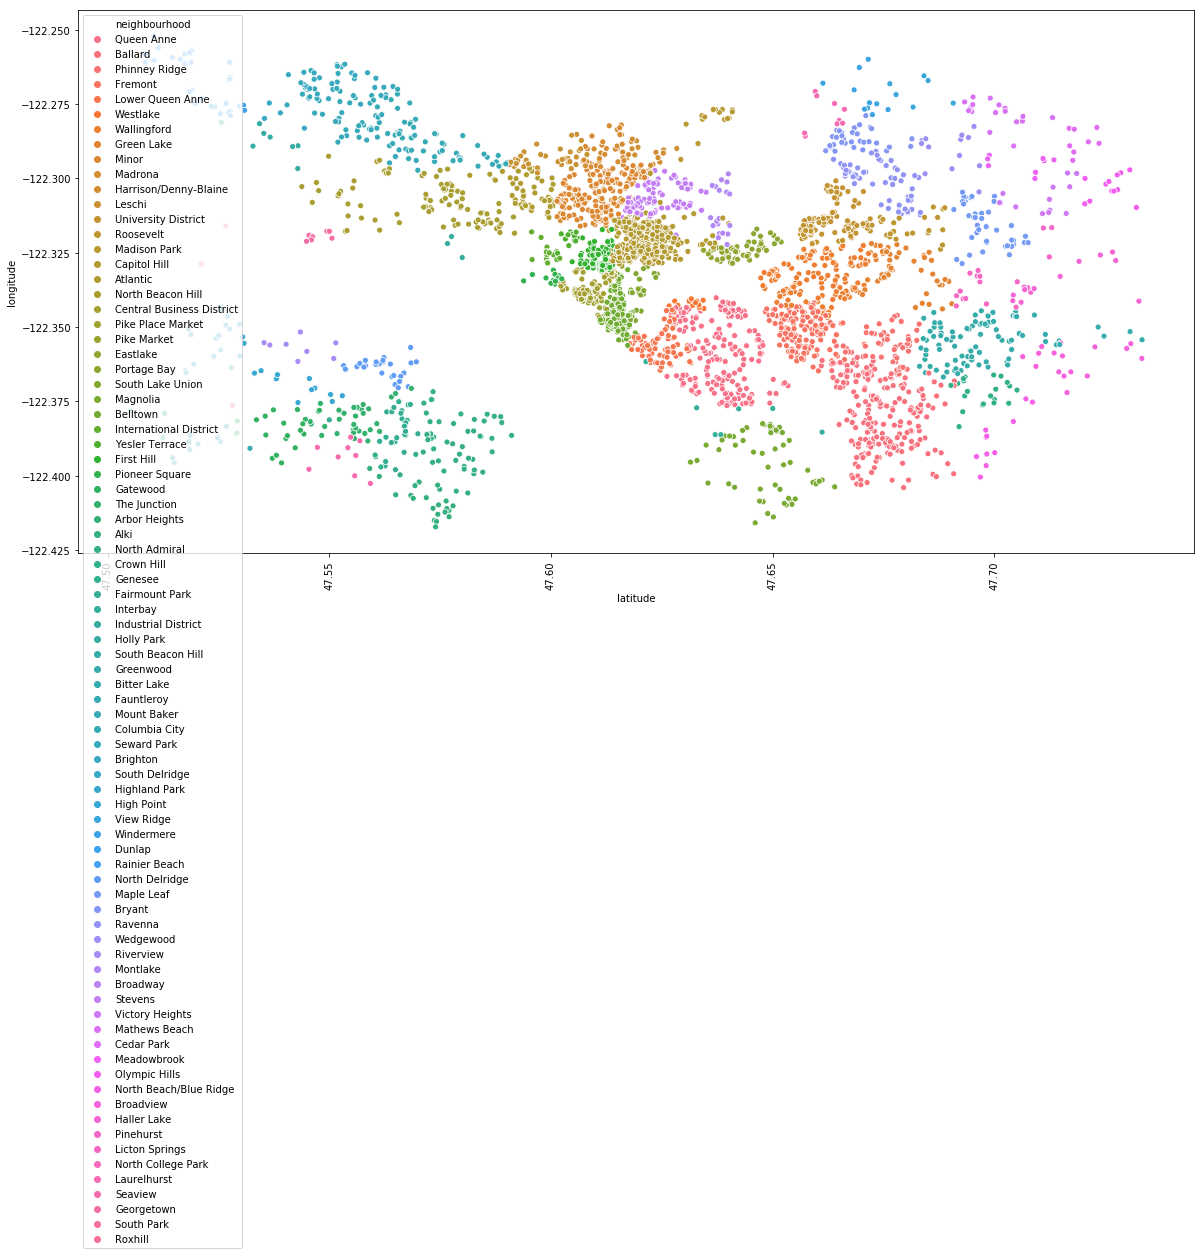

In [26]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue = 'neighbourhood' , y ='longitude',data = df_listing)

The above two graph show that the zipcode and neighborhood have lots of coincident. So I will choose neighborhood as the regressor.

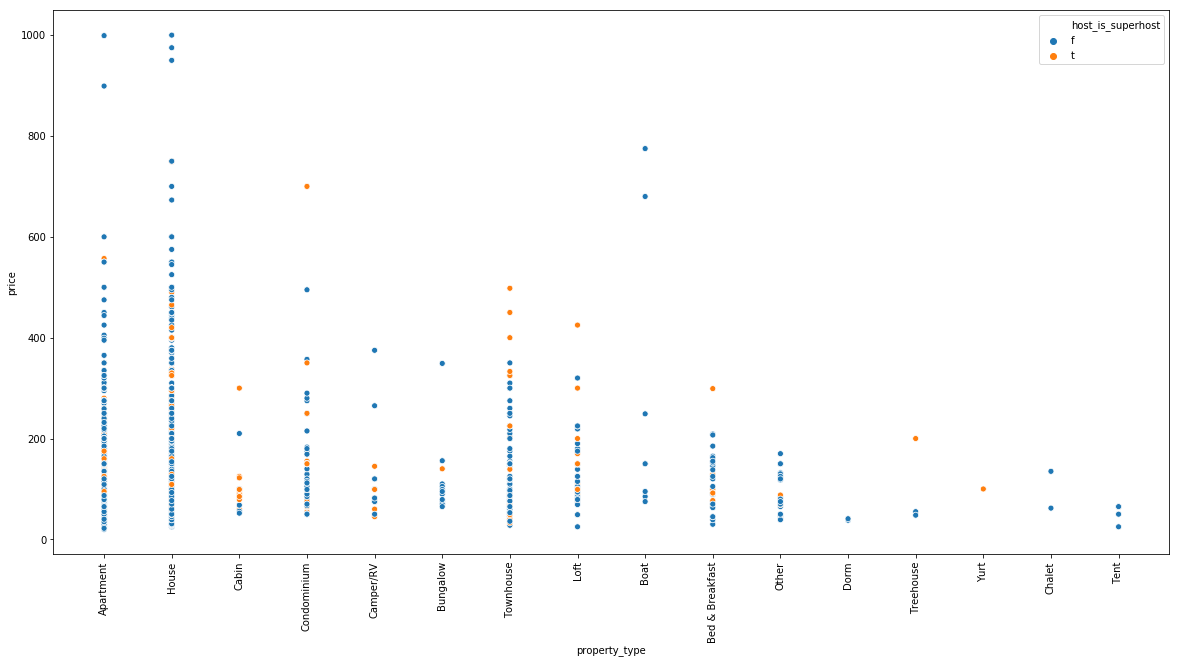

In [27]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='property_type', hue = 'host_is_superhost',y = 'price',data = df_listing)

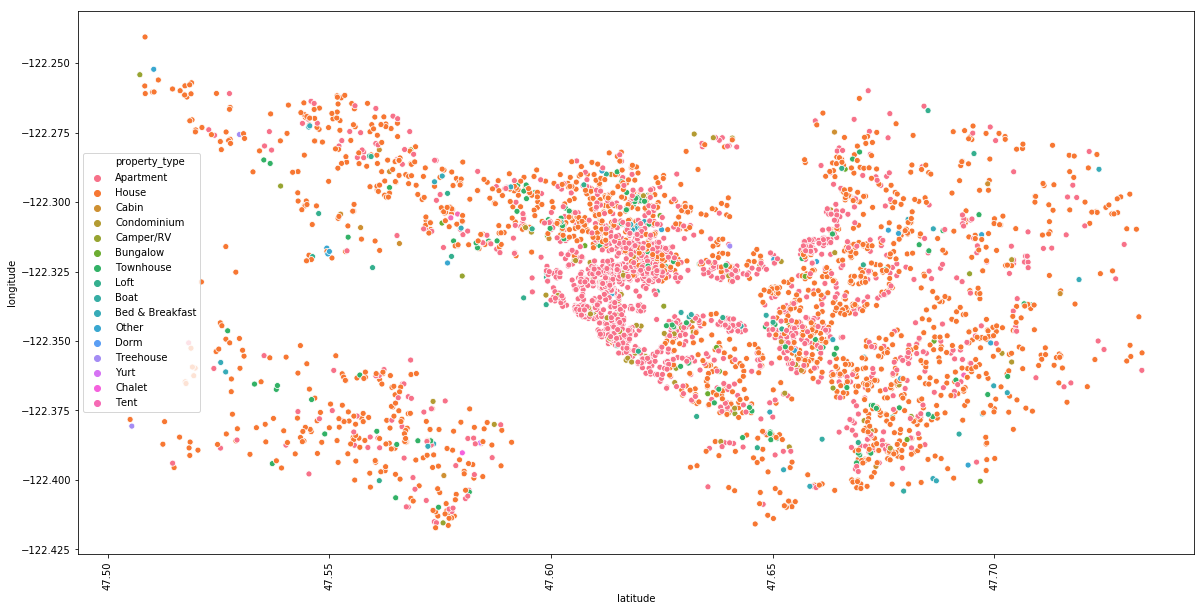

In [28]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue = 'property_type' , y ='longitude',data = df_listing)

We can find that in the center of city, the rent are mainly apartment.

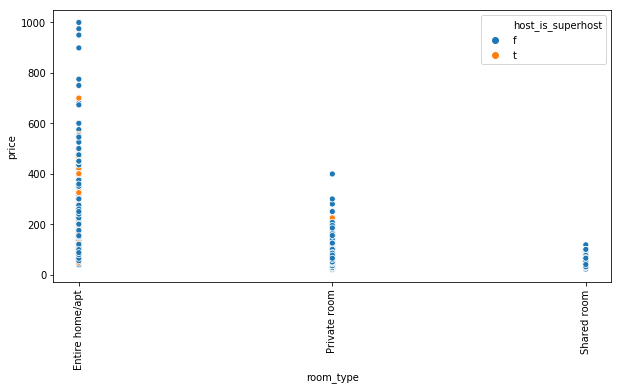

In [29]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
sns.scatterplot(x ='room_type', hue = 'host_is_superhost',y = 'price',data = df_listing)

most of the supterhost rent out entire home/apartment. The shared room, and priviate room has a cheaper price than the entire home/apt.

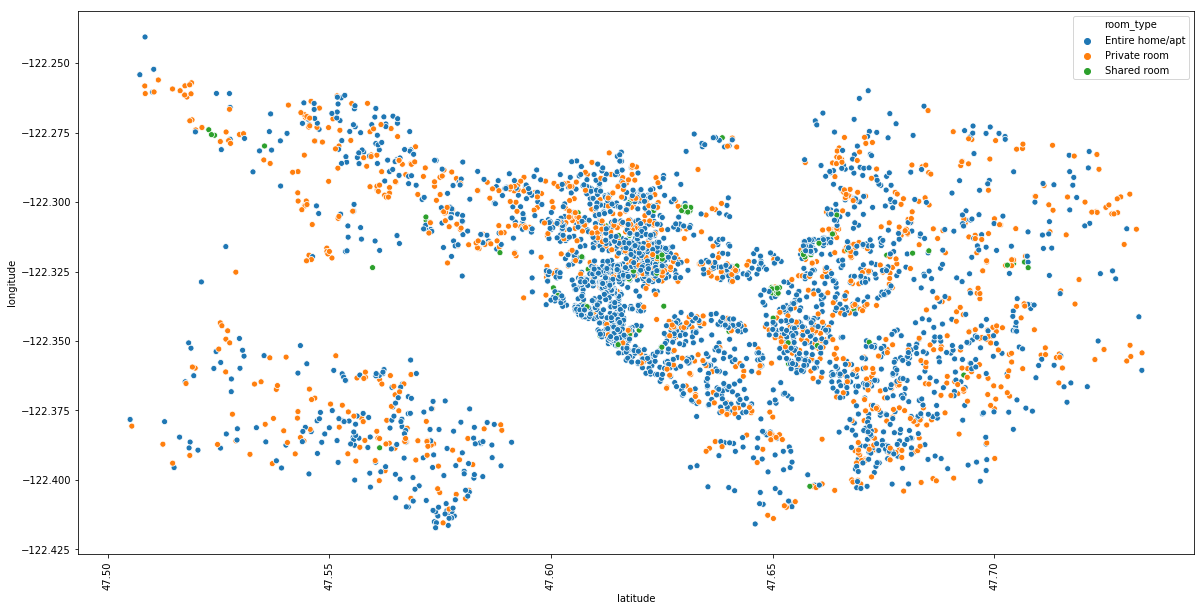

In [30]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue = 'room_type' , y ='longitude',data = df_listing)

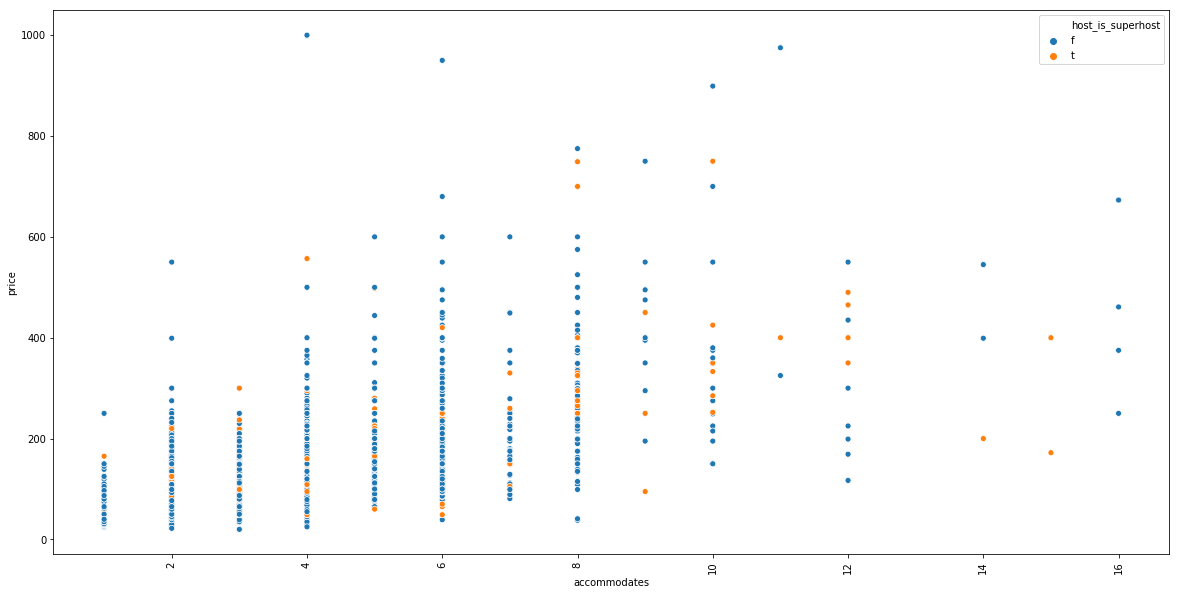

In [31]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='accommodates', hue = 'host_is_superhost',y = 'price',data = df_listing)

most of the house/apartment has accommodates less than 10.

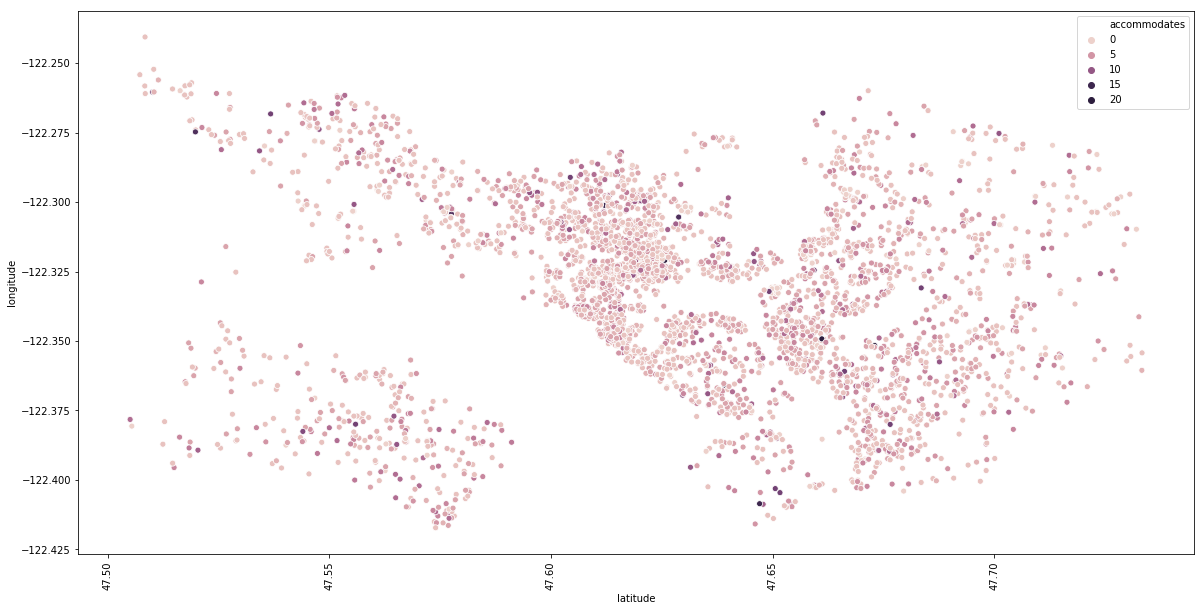

In [32]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='accommodates' , y ='longitude',data = df_listing)

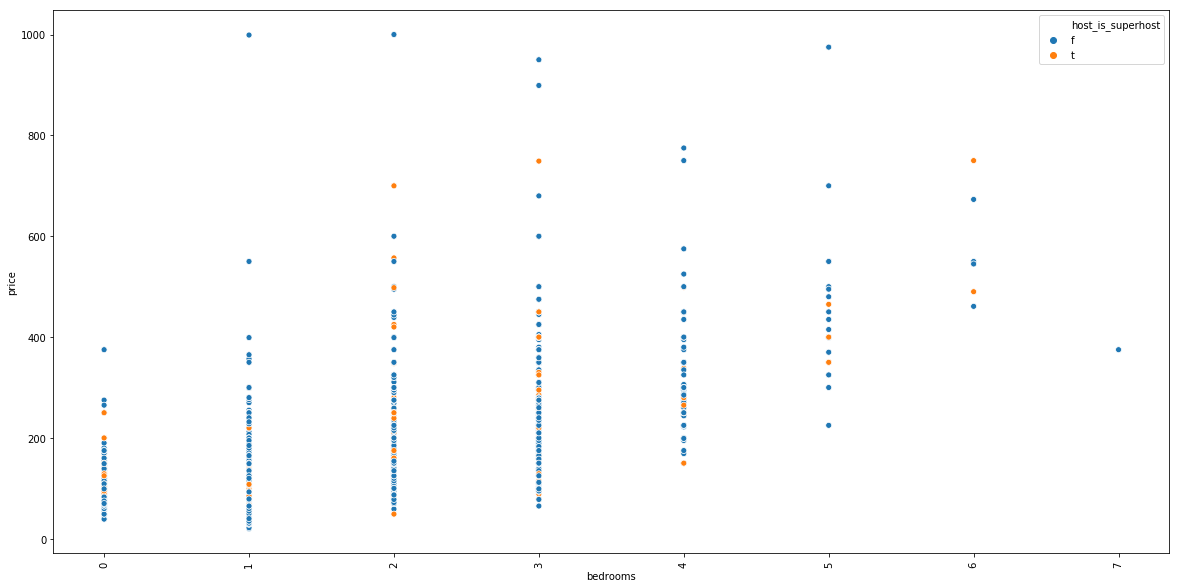

In [33]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='bedrooms', hue = 'host_is_superhost',y = 'price',data = df_listing)

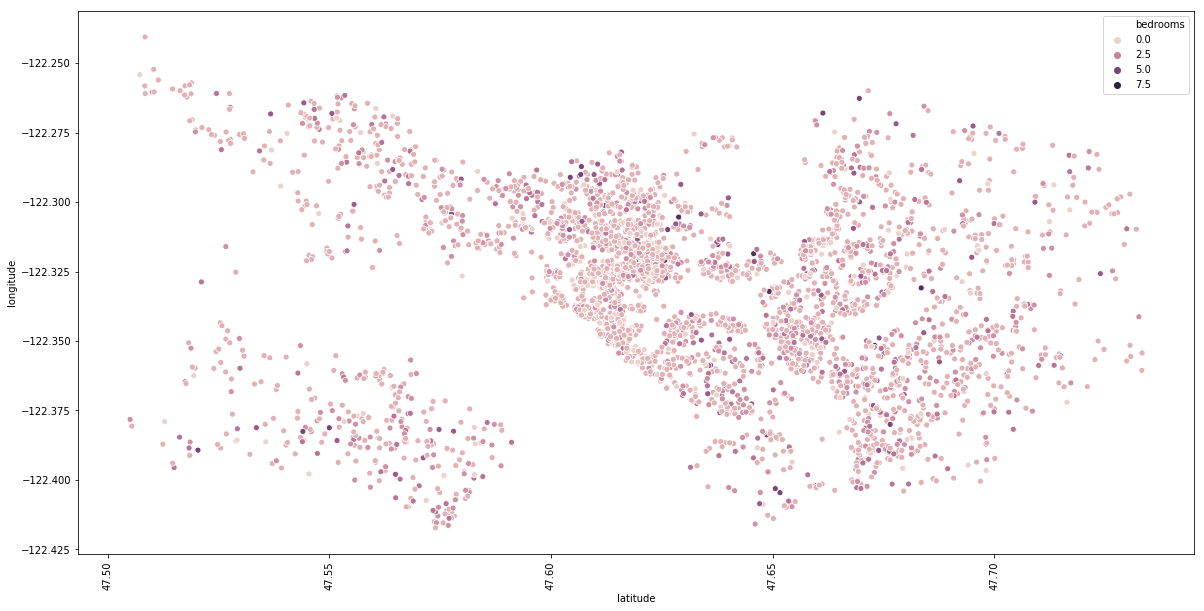

In [34]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='bedrooms' , y ='longitude',data = df_listing)

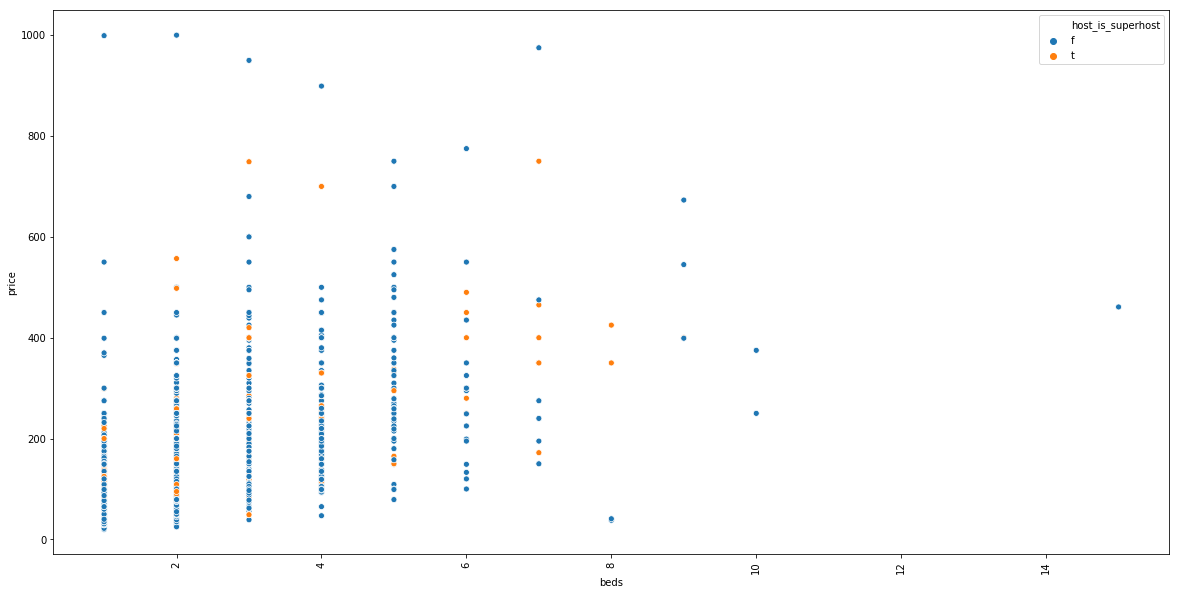

In [35]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='beds', hue = 'host_is_superhost',y = 'price',data = df_listing)

Some of house/apt has expensive price with 1 bed

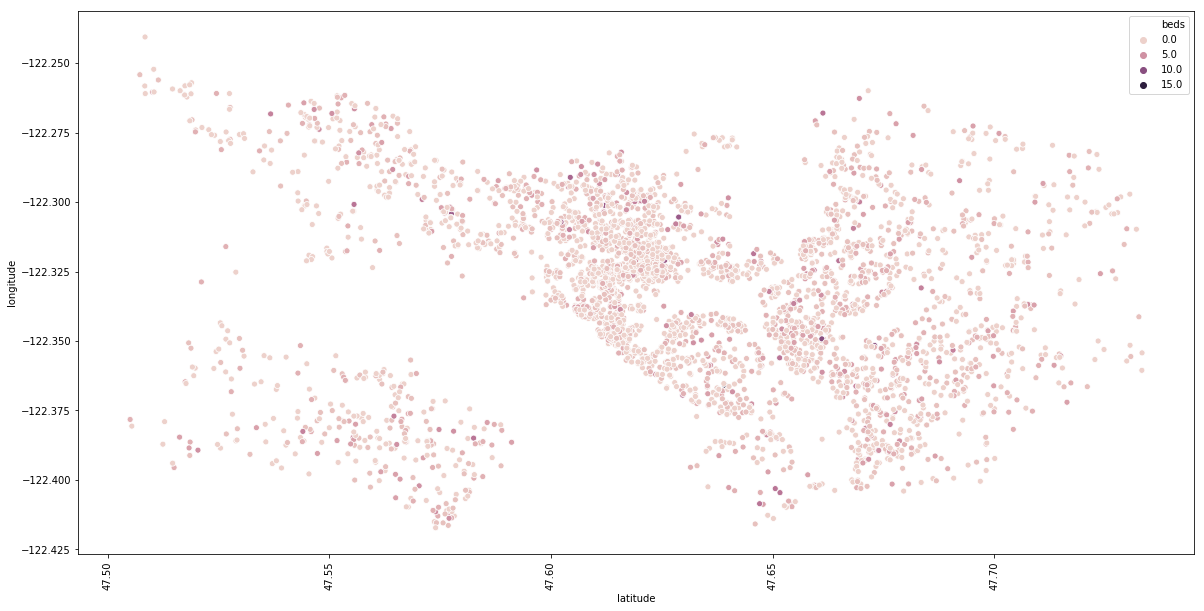

In [36]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='beds' , y ='longitude',data = df_listing)

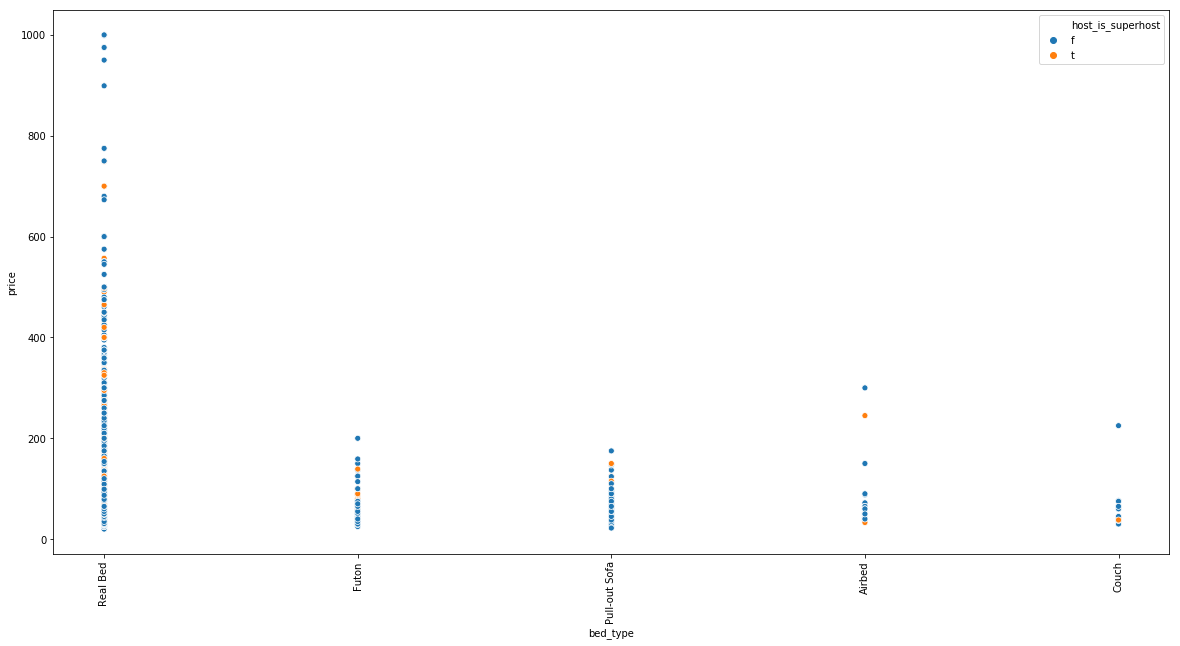

In [37]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='bed_type', hue = 'host_is_superhost',y = 'price',data = df_listing)

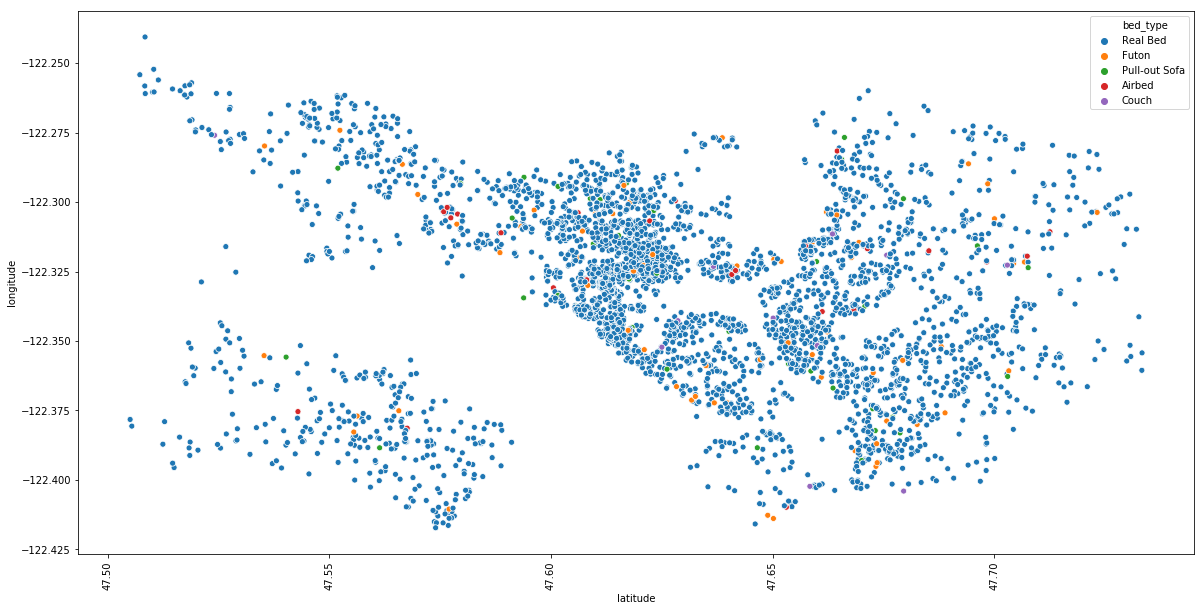

In [38]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='bed_type' , y ='longitude',data = df_listing)

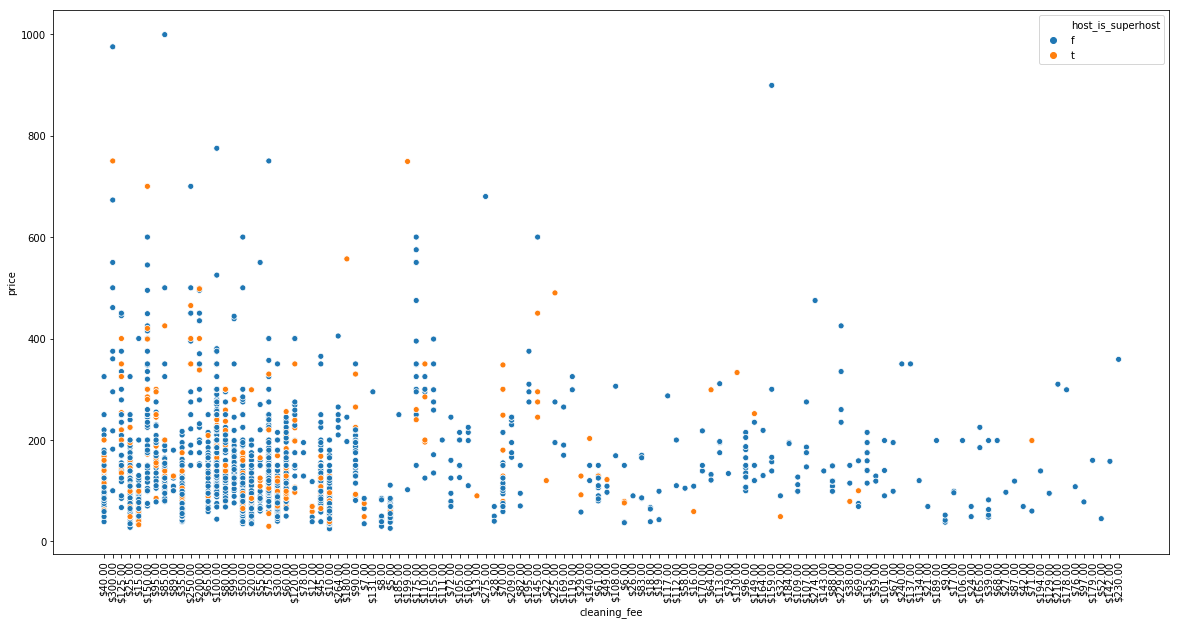

In [39]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='cleaning_fee', hue = 'host_is_superhost',y = 'price',data = df_listing)

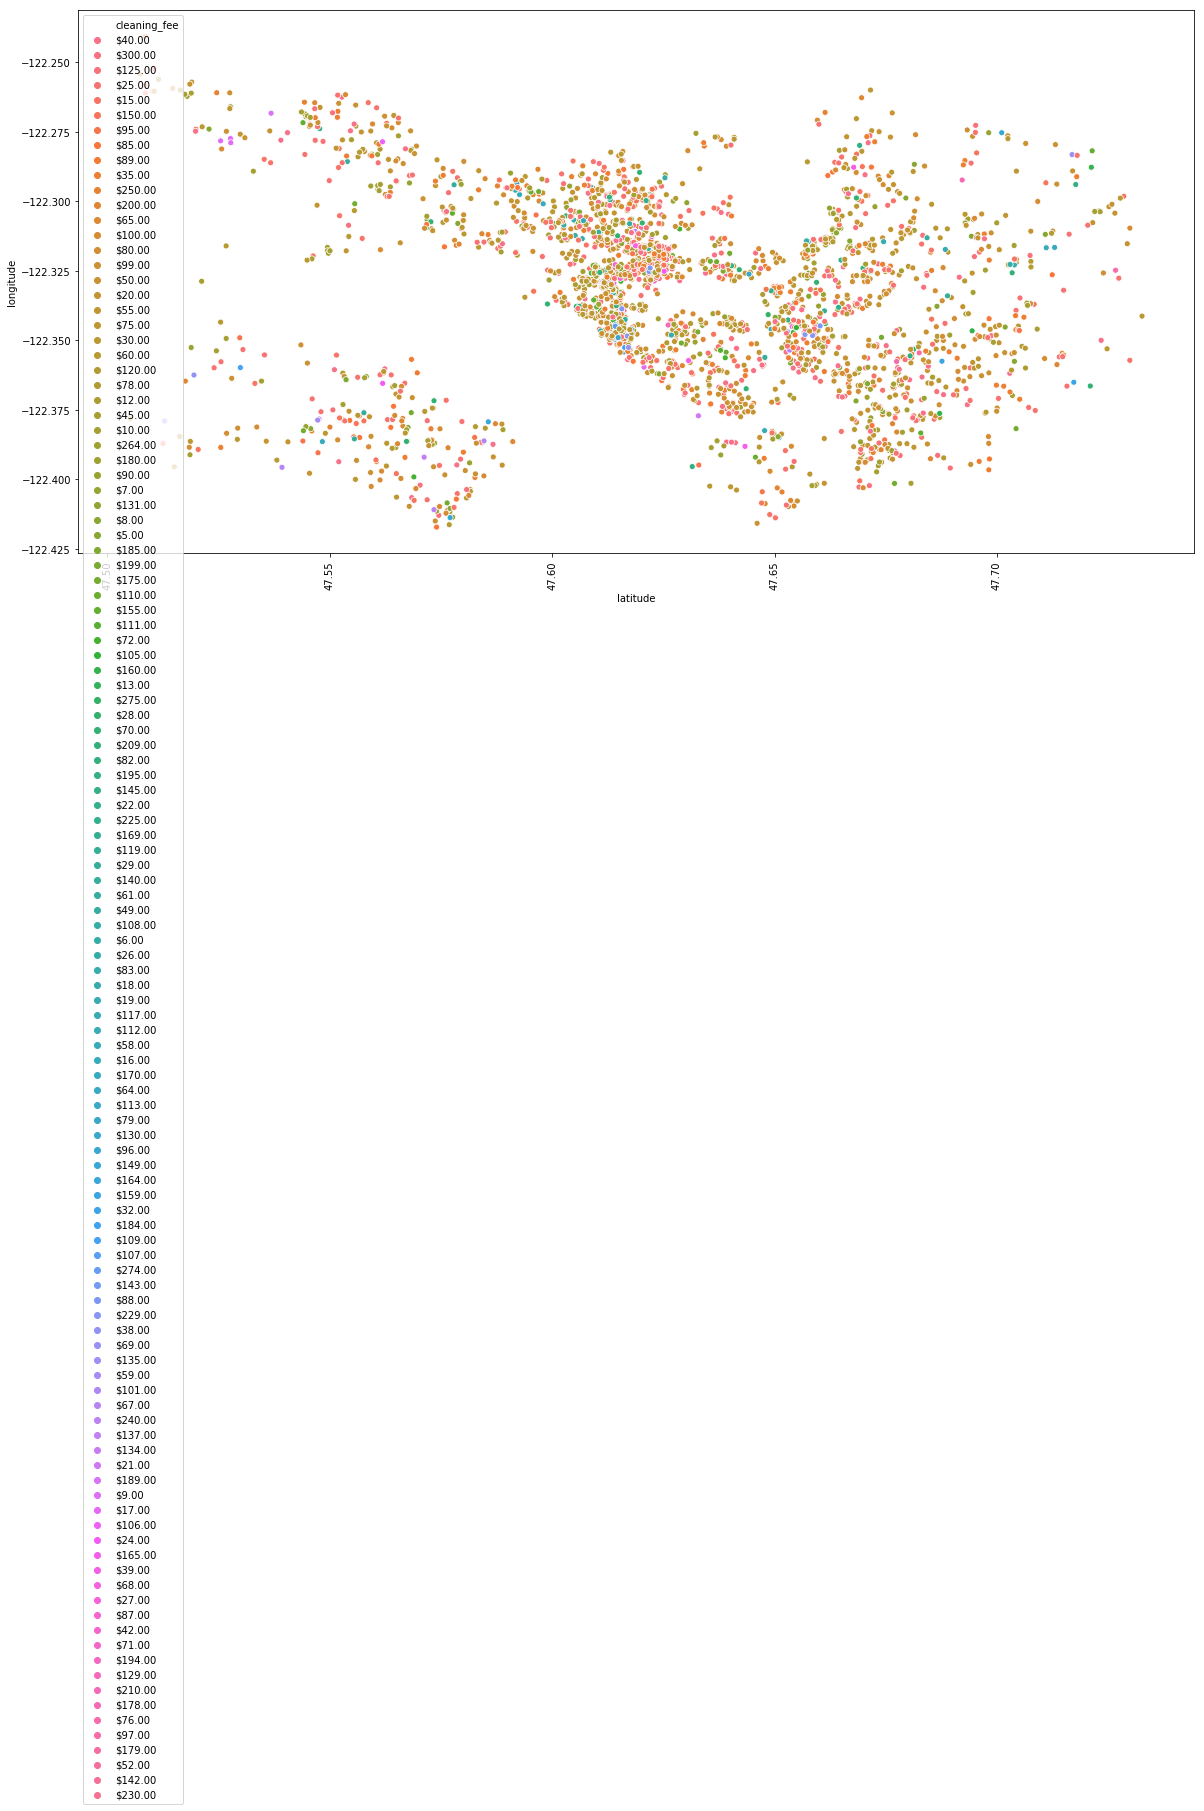

In [40]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='cleaning_fee' , y ='longitude',data = df_listing)

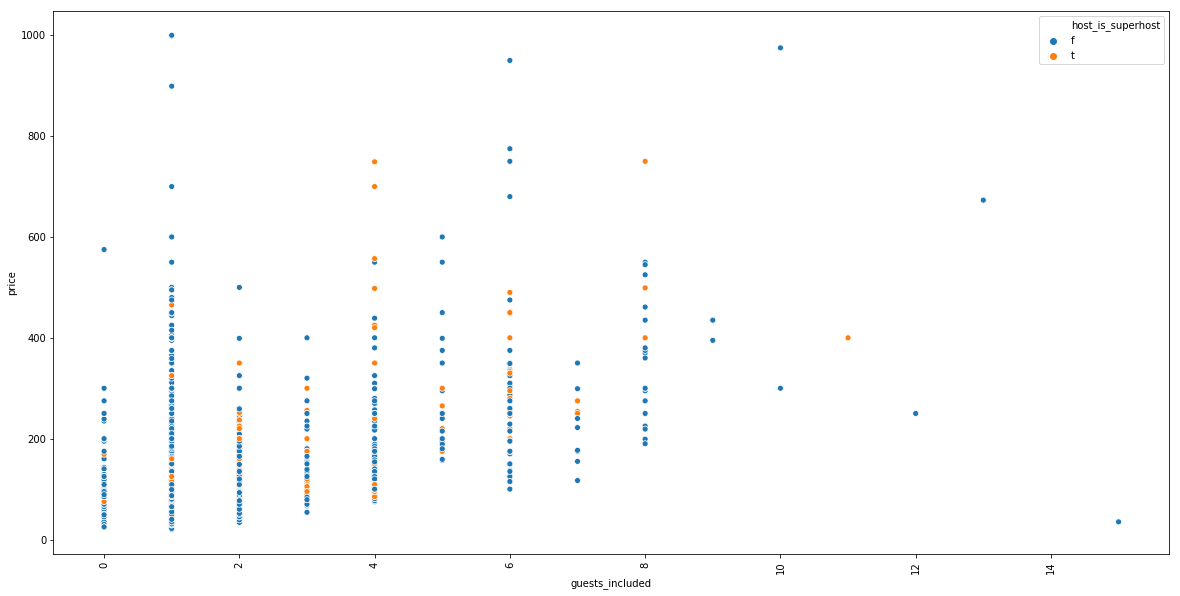

In [41]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='guests_included', hue = 'host_is_superhost',y = 'price',data = df_listing)

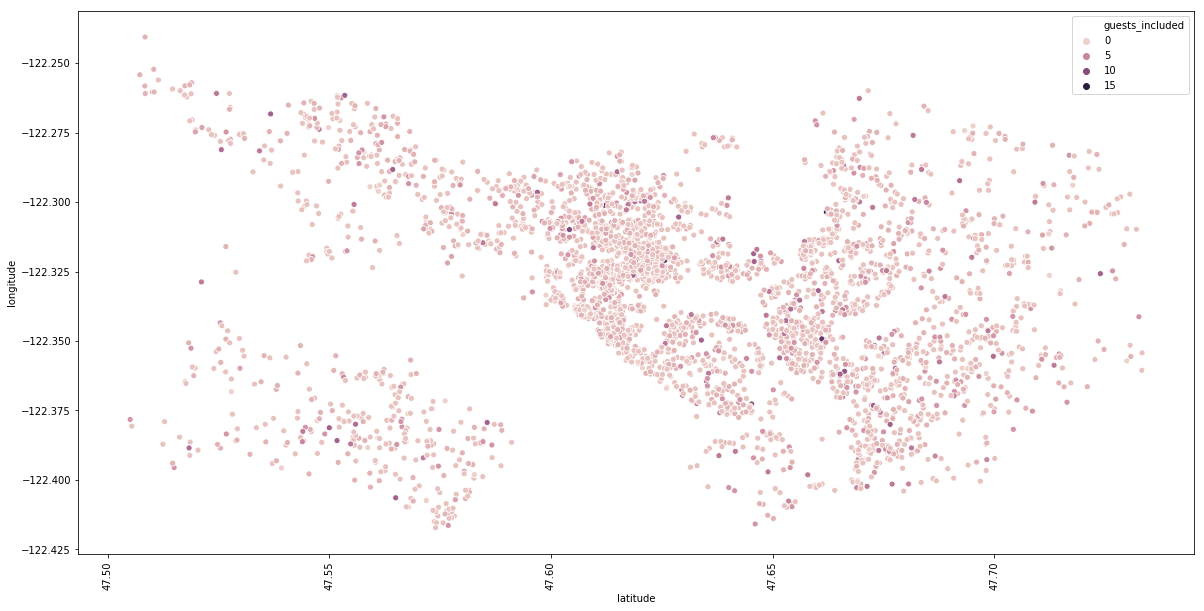

In [42]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='guests_included' , y ='longitude',data = df_listing)

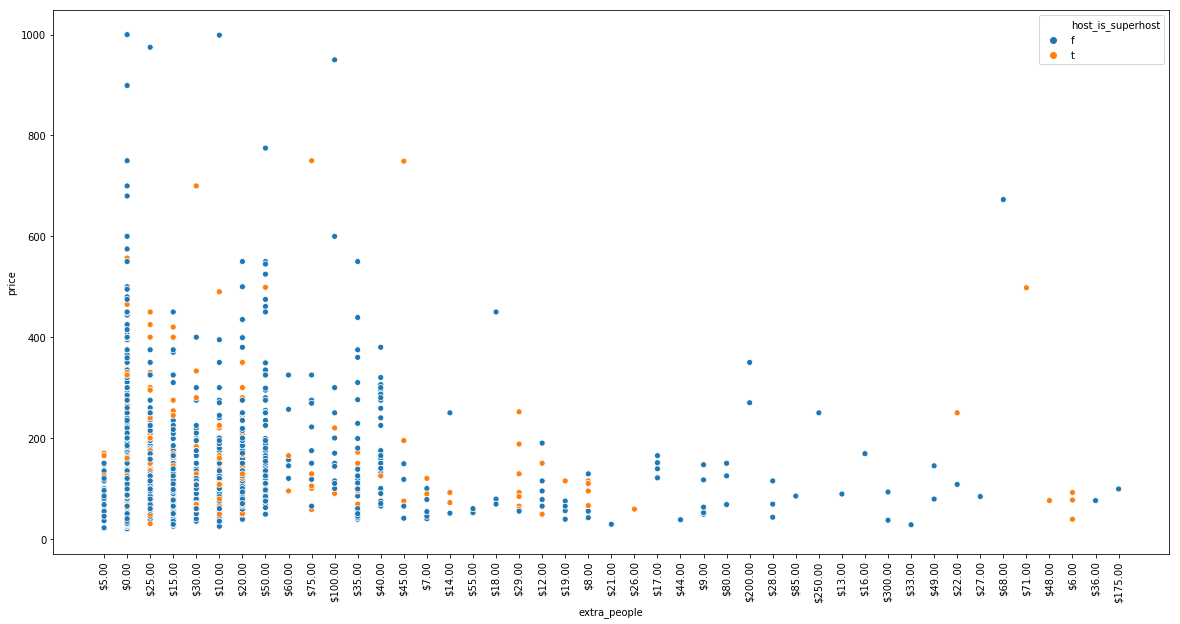

In [43]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='extra_people', hue = 'host_is_superhost',y = 'price',data = df_listing)

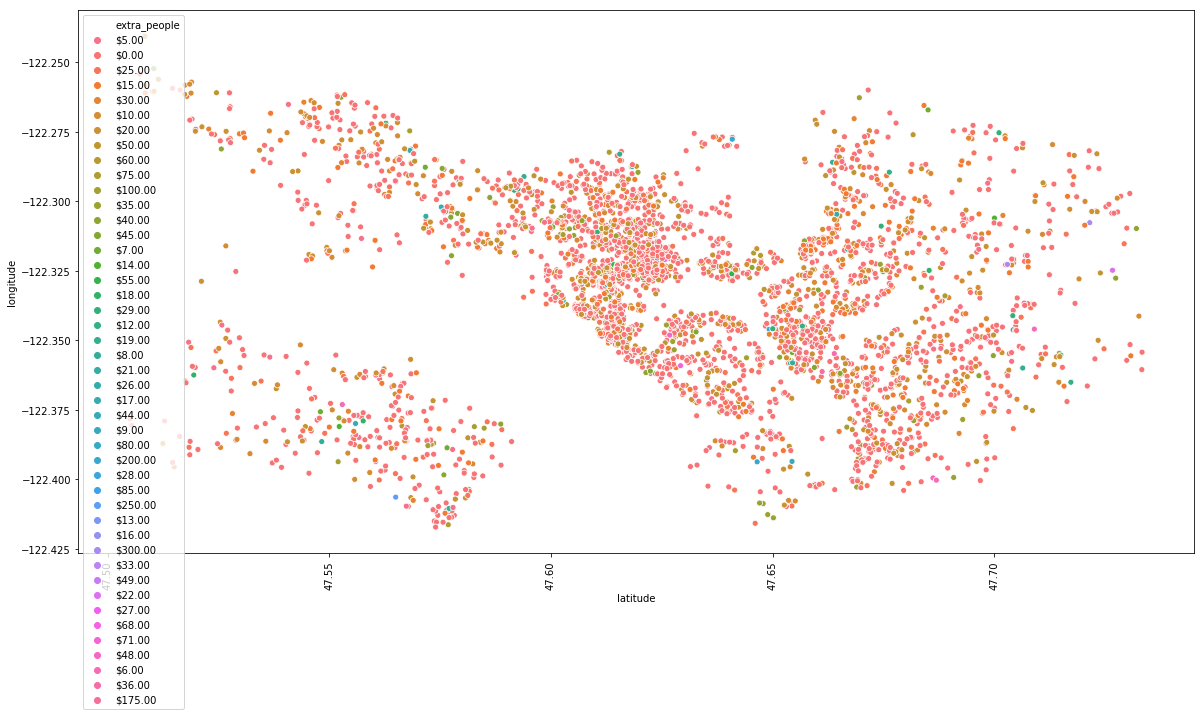

In [44]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='extra_people' , y ='longitude',data = df_listing)

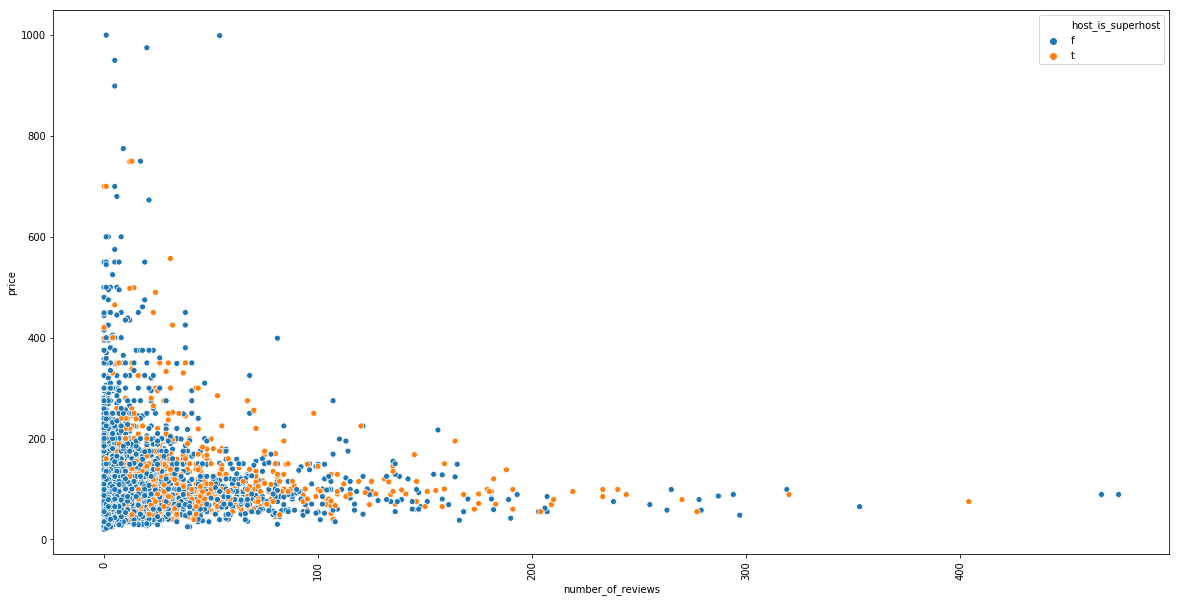

In [45]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='number_of_reviews', hue = 'host_is_superhost',y = 'price',data = df_listing)

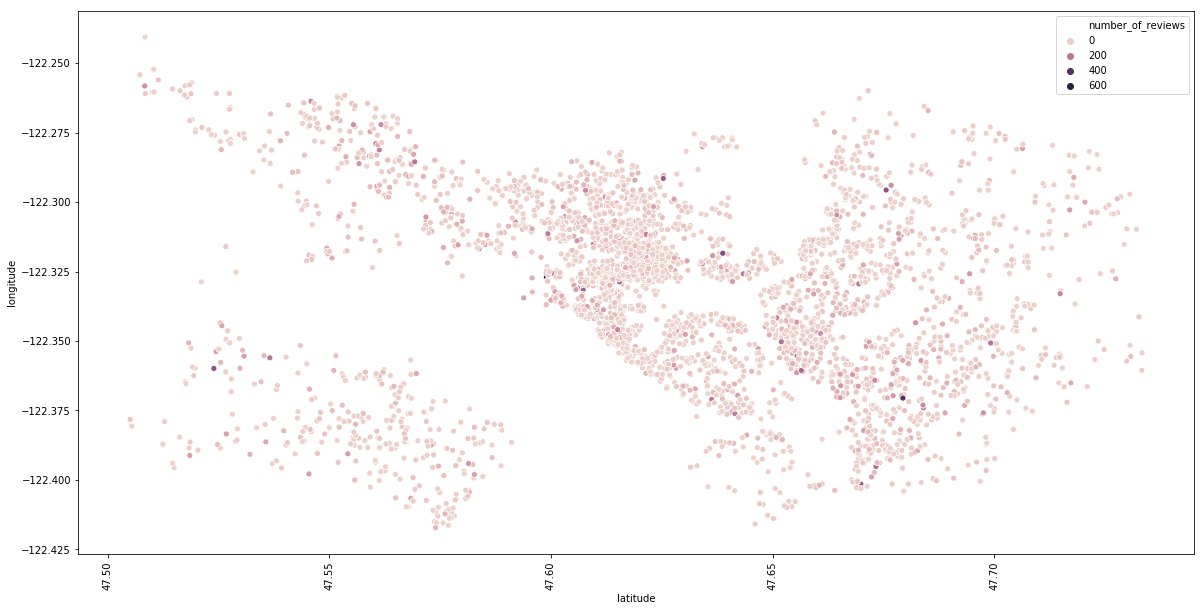

In [46]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='number_of_reviews' , y ='longitude',data = df_listing)

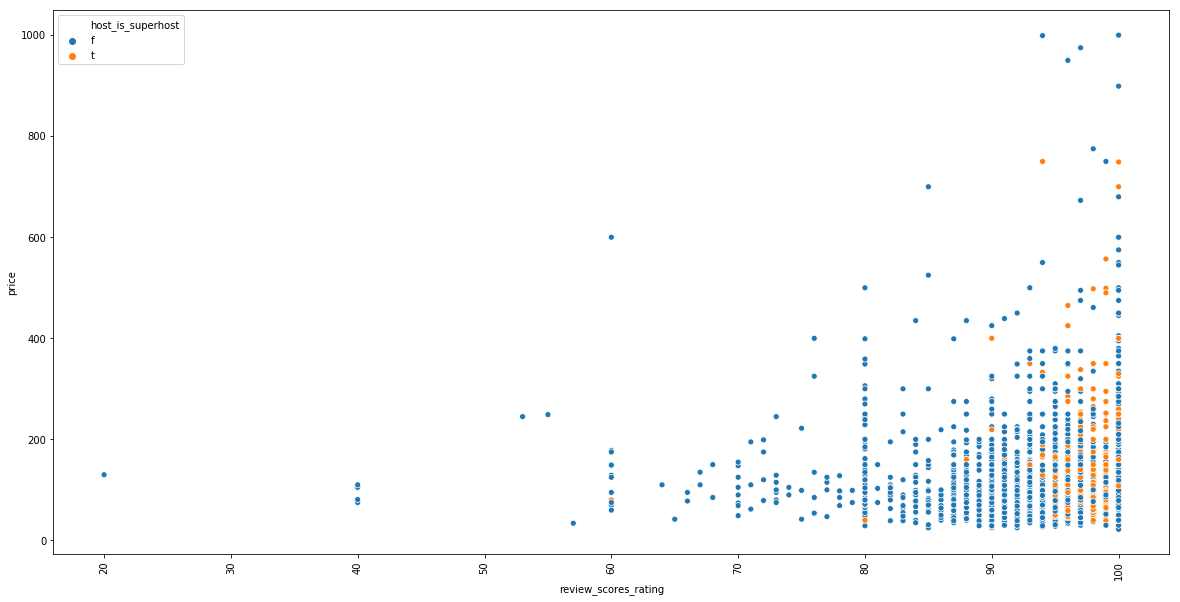

In [47]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='review_scores_rating', hue = 'host_is_superhost',y = 'price',data = df_listing)

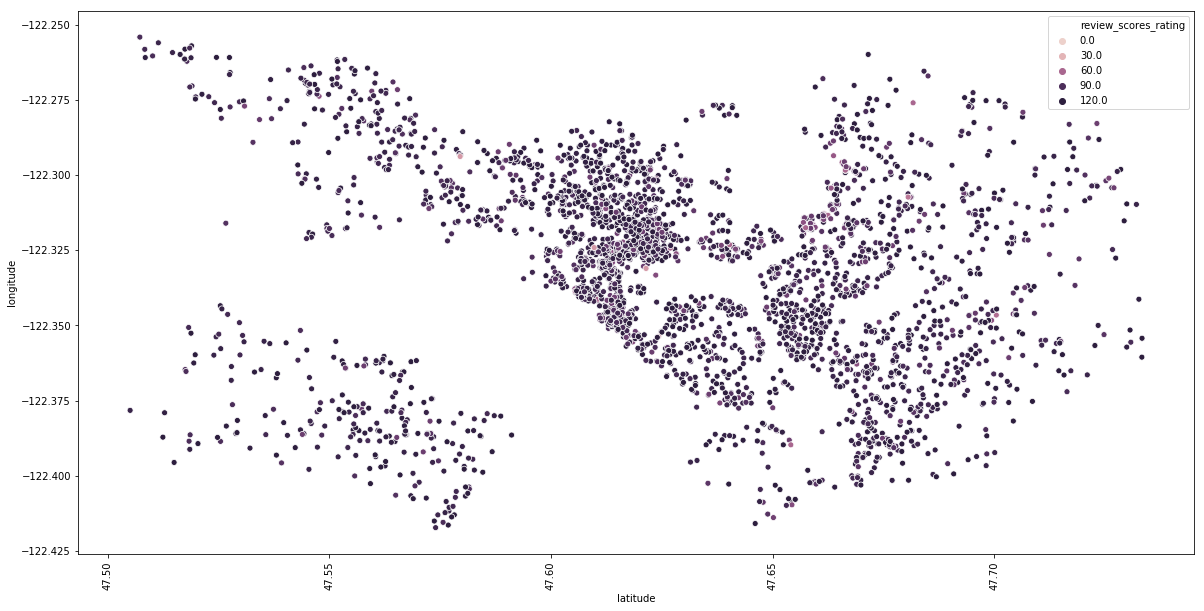

In [48]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='review_scores_rating' , y ='longitude',data = df_listing)

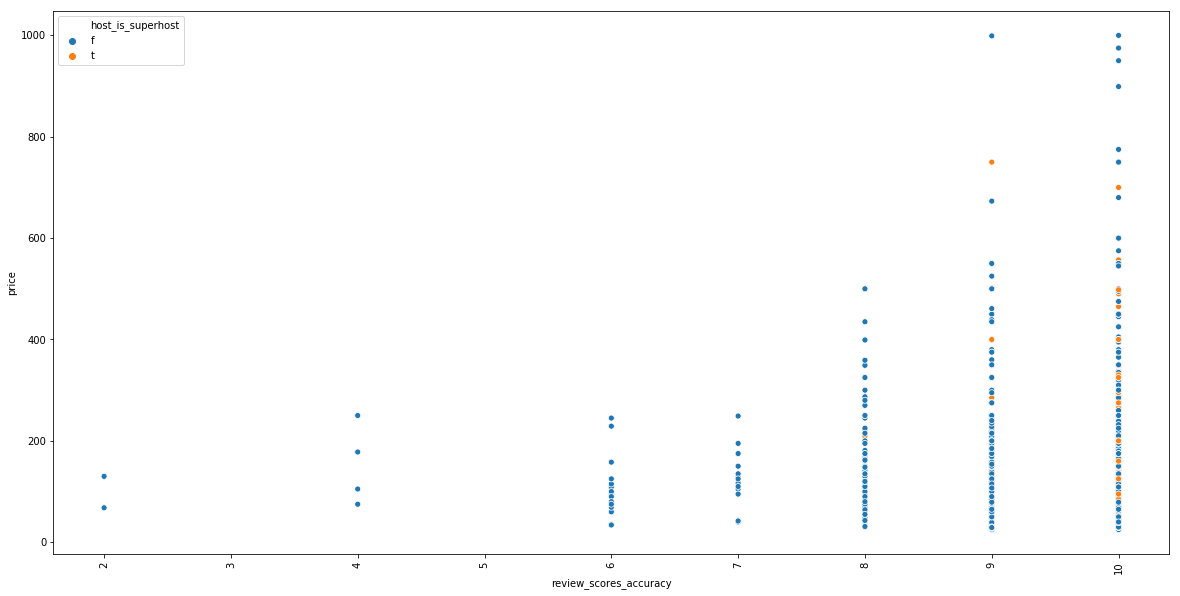

In [49]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='review_scores_accuracy', hue = 'host_is_superhost',y = 'price',data = df_listing)

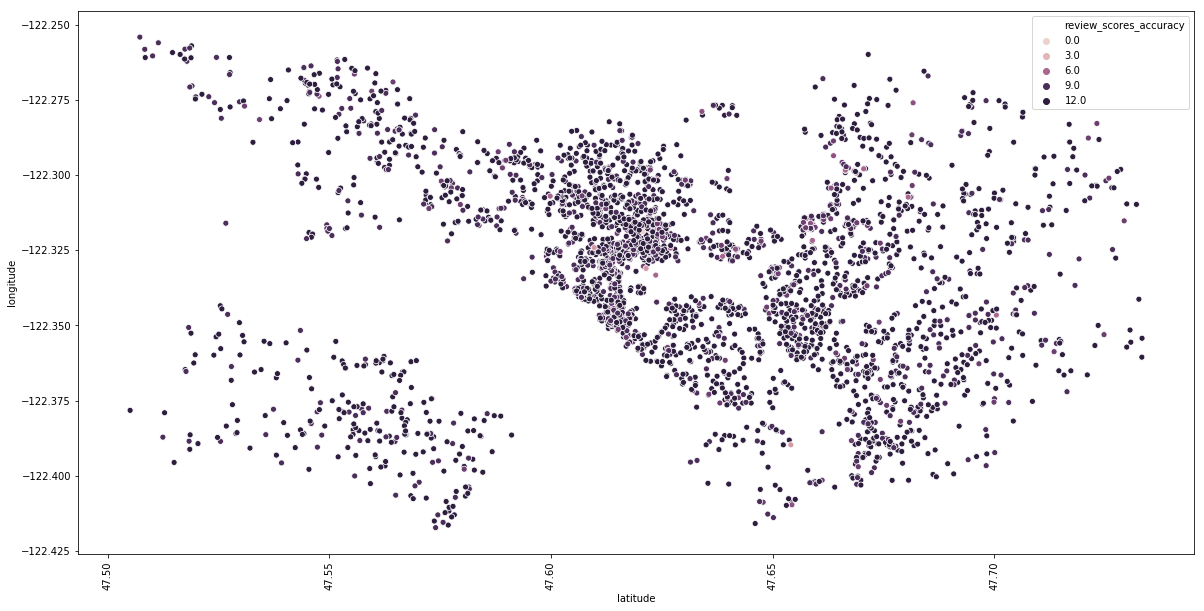

In [50]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='review_scores_accuracy' , y ='longitude',data = df_listing)

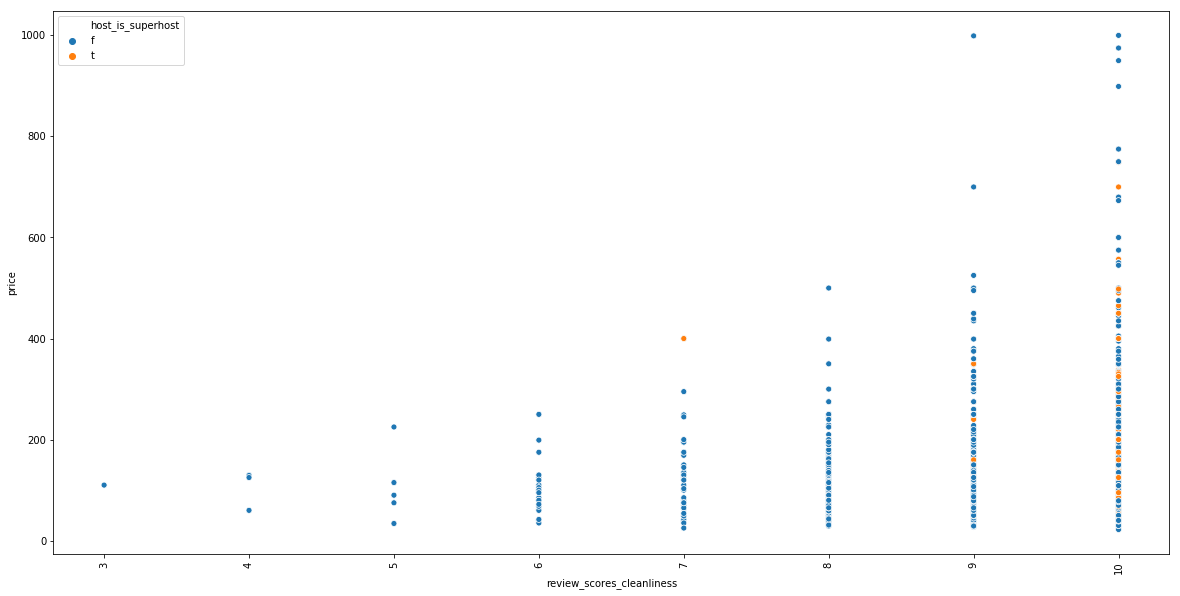

In [51]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='review_scores_cleanliness', hue = 'host_is_superhost',y = 'price',data = df_listing)

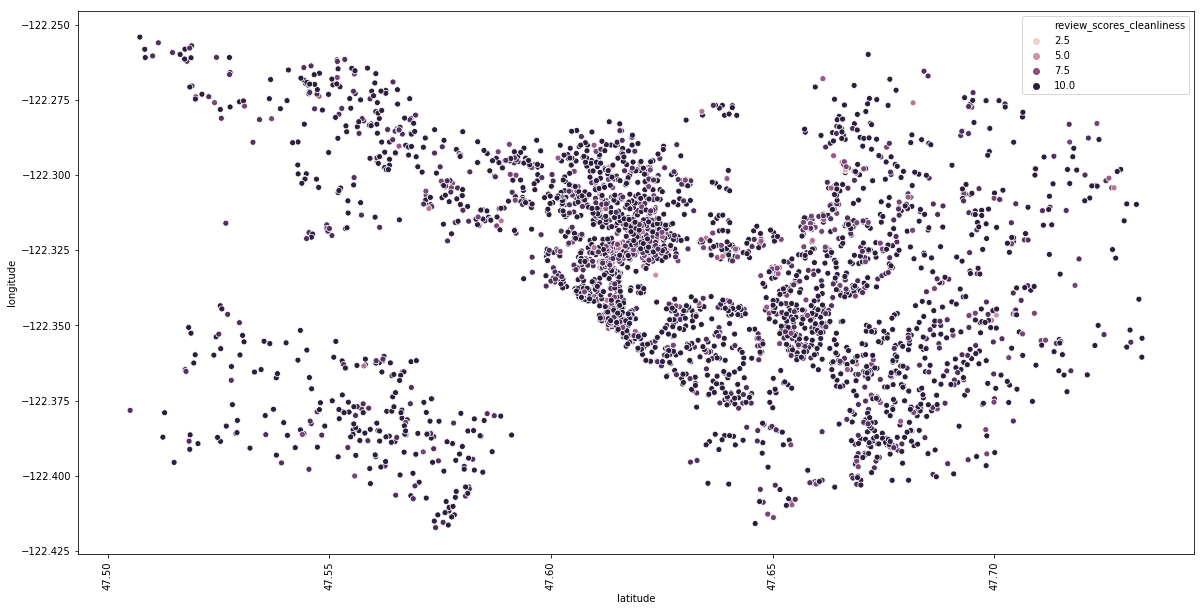

In [52]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='review_scores_cleanliness' , y ='longitude',data = df_listing)

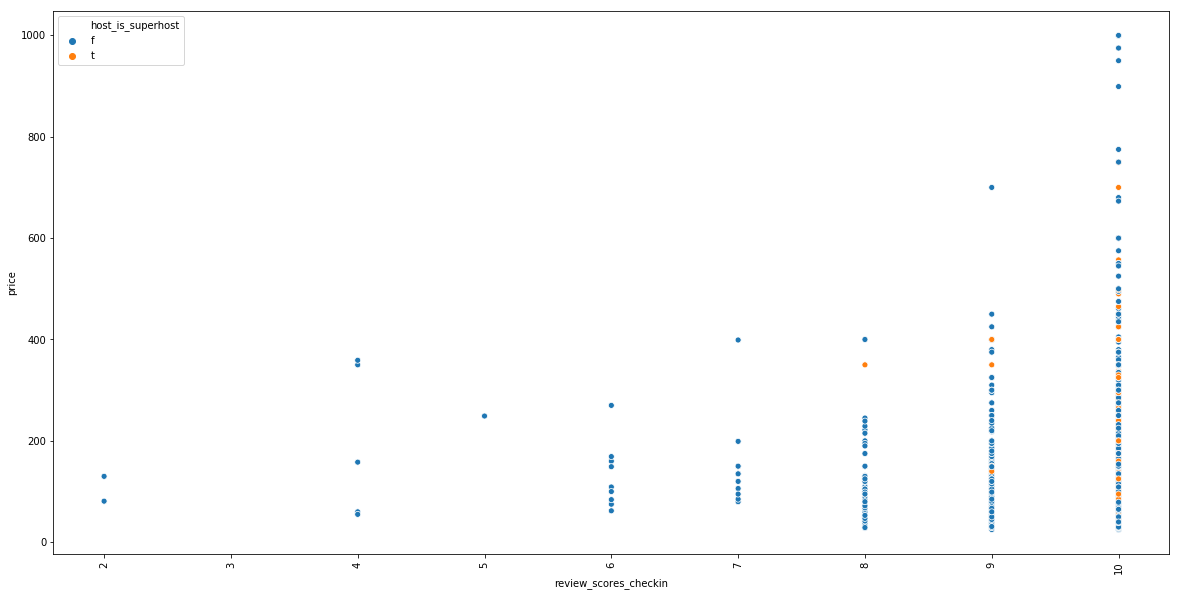

In [53]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='review_scores_checkin', hue = 'host_is_superhost',y = 'price',data = df_listing)

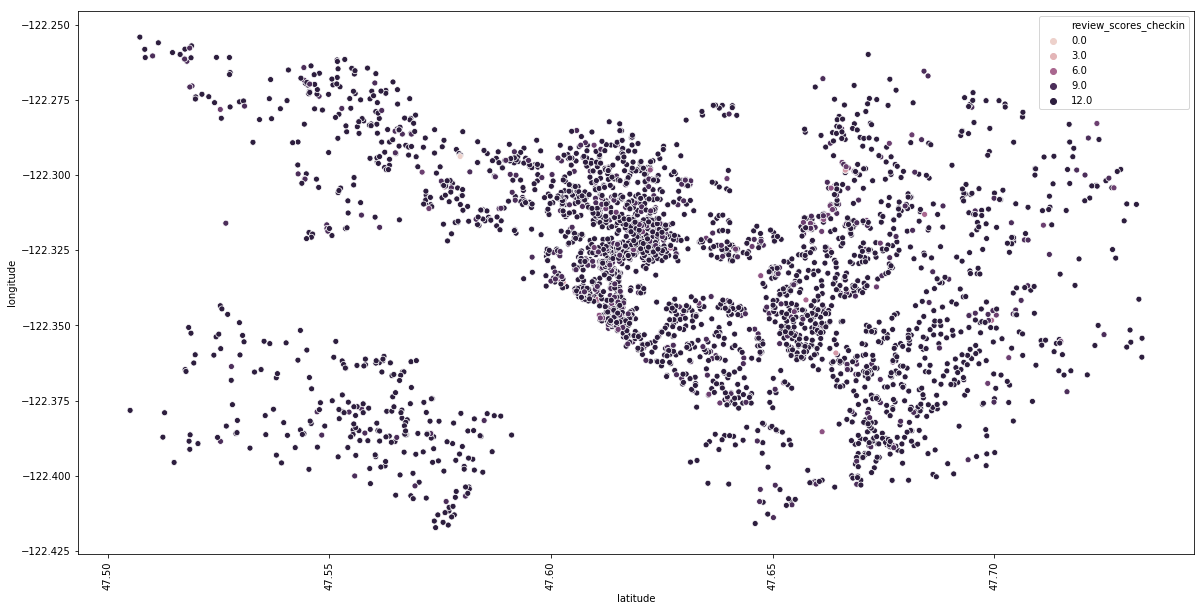

In [54]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='review_scores_checkin' , y ='longitude',data = df_listing)

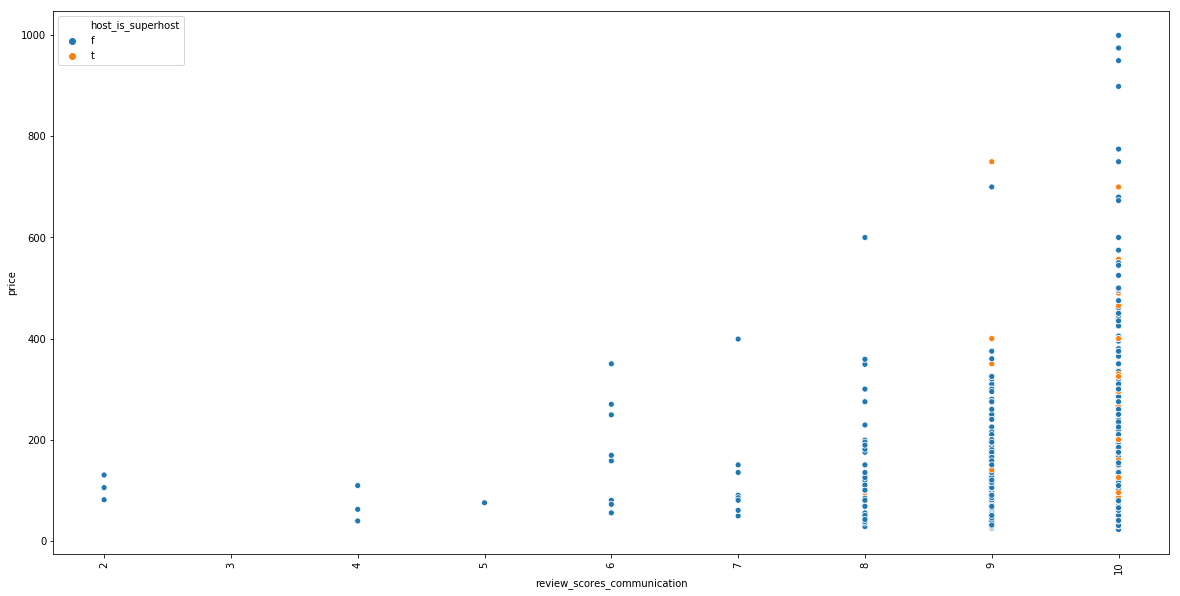

In [55]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='review_scores_communication', hue = 'host_is_superhost',y = 'price',data = df_listing)

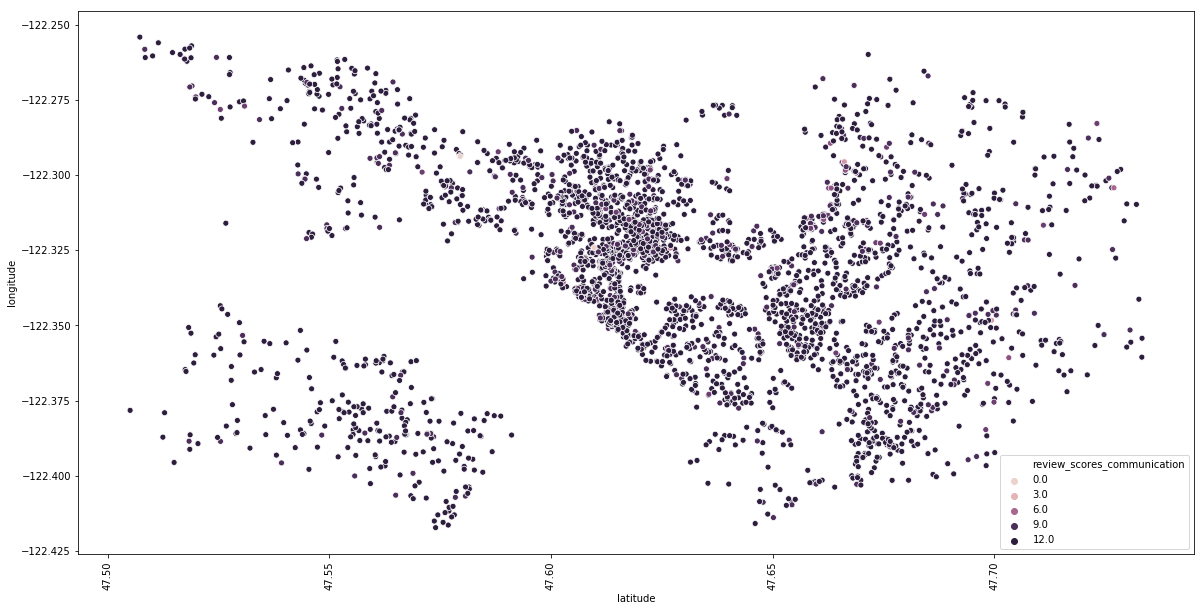

In [56]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='review_scores_communication' , y ='longitude',data = df_listing)

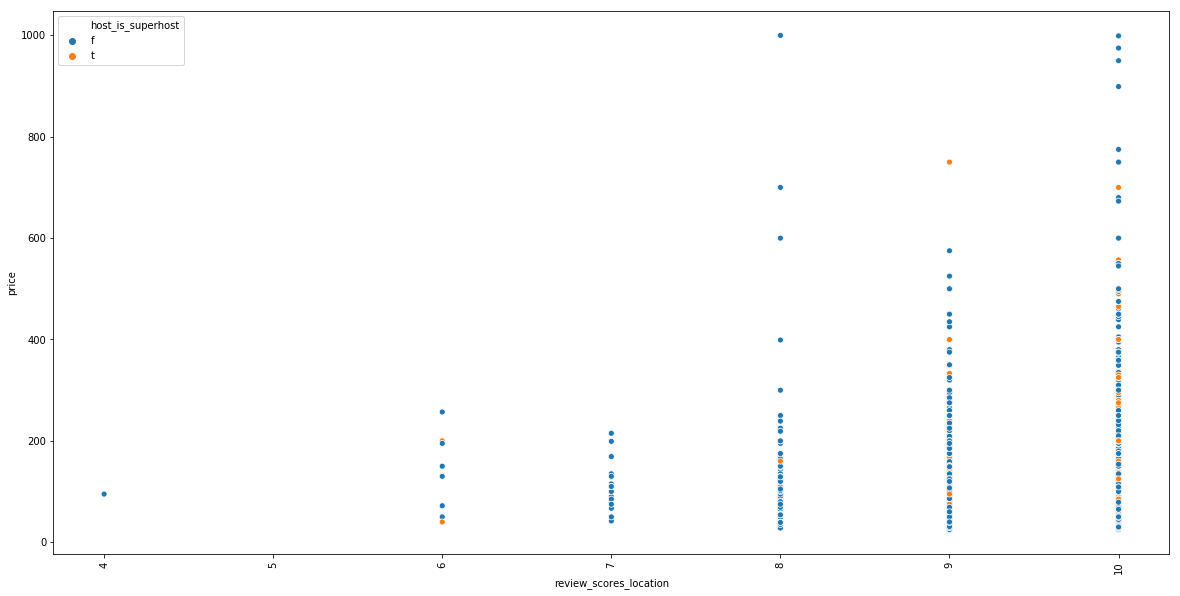

In [57]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='review_scores_location', hue = 'host_is_superhost',y = 'price',data = df_listing)

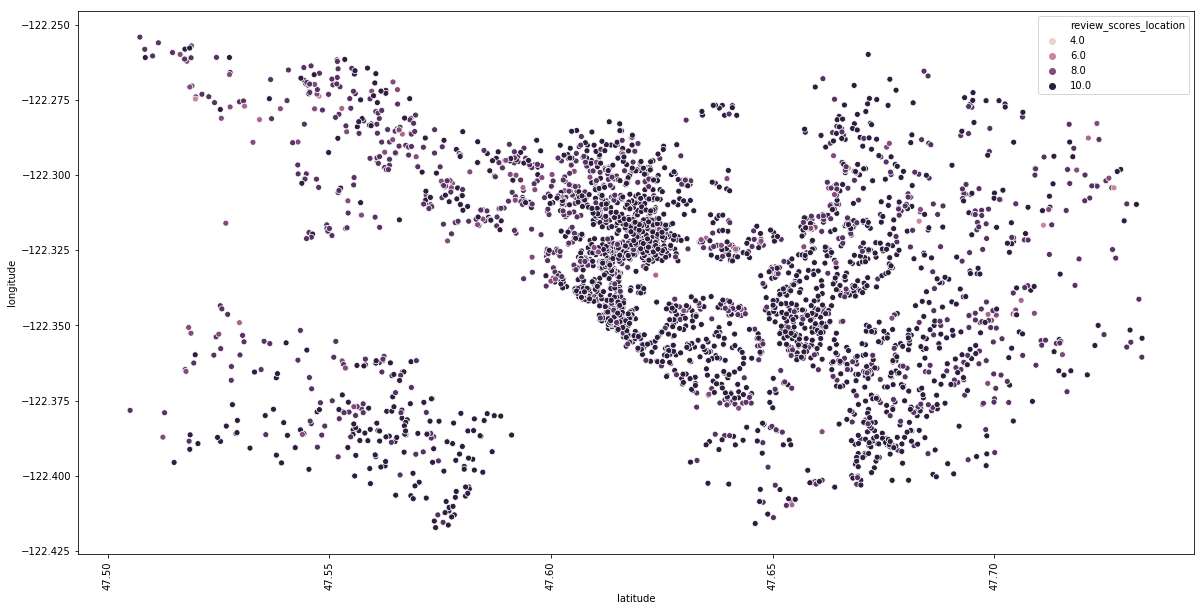

In [58]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='review_scores_location' , y ='longitude',data = df_listing)

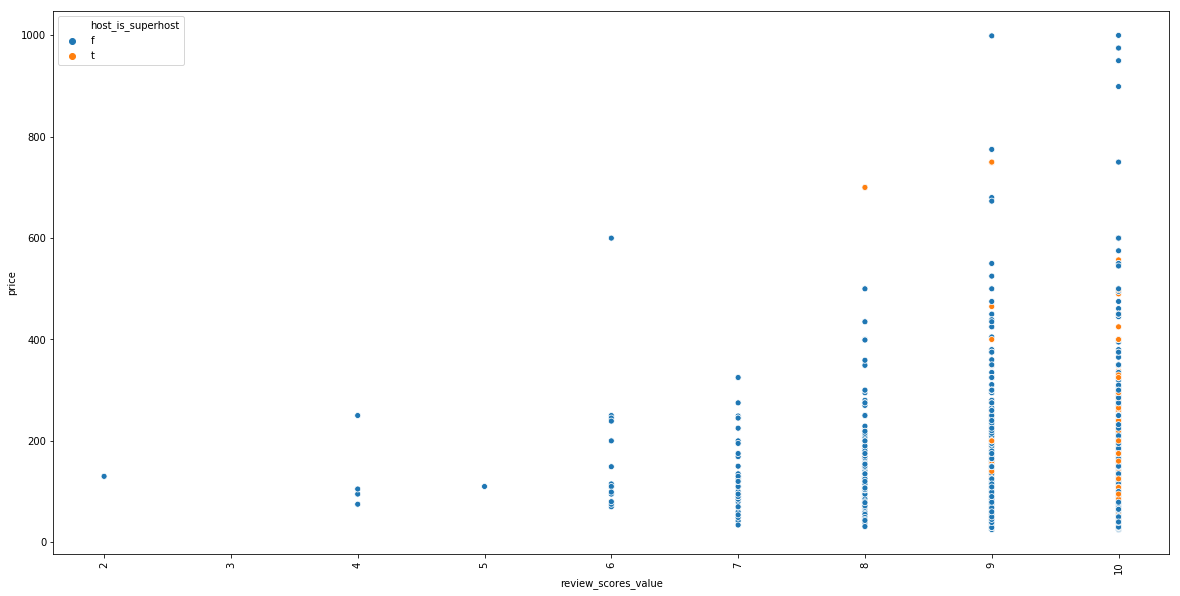

In [59]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x ='review_scores_value', hue = 'host_is_superhost',y = 'price',data = df_listing)

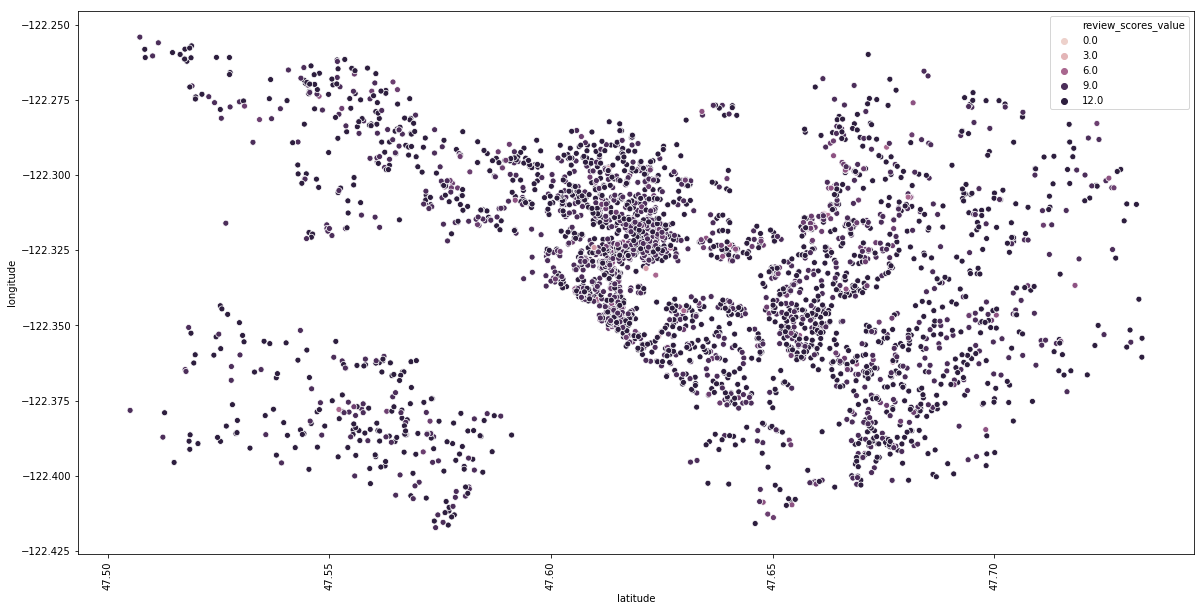

In [60]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.scatterplot(x = 'latitude',hue ='review_scores_value' , y ='longitude',data = df_listing)

The superhosts get the higher review in general.

There are four factors that can affect the rent price:1)whether the host is superhost;2)location, the variables including 'neighborhood' and 'zipcode';3)Property type, including 'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'bed_type', 'cleaning_fee', 'guests_included', 'extra_people', 'cancellation_policy'. 4)review, including 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',  'review_scores_location',  'review_scores_value'. I will check the correlation between the above variables, and choose the correlated features. 

In [61]:
df_list_new = df_listing[[ 'price', 'host_is_superhost', 'neighbourhood', 'zipcode', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'cleaning_fee', 'guests_included', 'extra_people', 'cancellation_policy','number_of_reviews',
      'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value' ]]

In [62]:
df_list_new.corr()

price  accommodates  bathrooms  bedrooms  \
price                        1.000000      0.652218   0.516424  0.627720   
accommodates                 0.652218      1.000000   0.538439  0.770974   
bathrooms                    0.516424      0.538439   1.000000  0.610937   
bedrooms                     0.627720      0.770974   0.610937  1.000000   
beds                         0.589525      0.861119   0.532838  0.753167   
guests_included              0.392875      0.532796   0.304780  0.457009   
number_of_reviews           -0.124695     -0.072978  -0.092147 -0.105555   
review_scores_rating         0.055551     -0.013101   0.045101  0.023257   
review_scores_accuracy       0.019026     -0.049665  -0.006129 -0.011943   
review_scores_cleanliness    0.054357      0.011646   0.018063 -0.008089   
review_scores_checkin        0.007877     -0.019664  -0.002939  0.010509   
review_scores_communication  0.012990     -0.013208  -0.016067  0.001113   
review_scores_location       0.075069     -0.037520  -0.008959 -0.028991   
review_scores_value         -0.041776     -0.062041   0.014297 -0.001208   

                                 beds  guests_included  number_of_reviews  \
price                        0.589525         0.392875          -0.124695   
accommodates                 0.861119         0.532796          -0.072978   
bathrooms                    0.532838         0.304780          -0.092147   
bedrooms                     0.753167         0.457009          -0.105555   
beds                         1.000000         0.460512          -0.089077   
guests_included              0.460512         1.000000           0.028114   
number_of_reviews           -0.089077         0.028114           1.000000   
review_scores_rating        -0.000720        -0.001430           0.036242   
review_scores_accuracy      -0.052767         0.003410           0.066618   
review_scores_cleanliness    0.004732         0.017999           0.055609   
review_scores_checkin       -0.021963         0.035315           0.089449   
review_scores_communication -0.013373         0.011658           0.072957   
review_scores_location      -0.023734        -0.026576          -0.009188   
review_scores_value         -0.029102        -0.021561           0.044110   

                             review_scores_rating  review_scores_accuracy  \
price                                    0.055551                0.019026   
accommodates                            -0.013101               -0.049665   
bathrooms                                0.045101               -0.006129   
bedrooms                                 0.023257               -0.011943   
beds                                    -0.000720               -0.052767   
guests_included                         -0.001430                0.003410   
number_of_reviews                        0.036242                0.066618   
review_scores_rating                     1.000000                0.621257   
review_scores_accuracy                   0.621257                1.000000   
review_scores_cleanliness                0.642882                0.543345   
review_scores_checkin                    0.521813                0.407238   
review_scores_communication              0.540620                0.423189   
review_scores_location                   0.368423                0.267605   
review_scores_value                      0.696534                0.562878   

                             review_scores_cleanliness  review_scores_checkin  \
price                                         0.054357               0.007877   
accommodates                                  0.011646              -0.019664   
bathrooms                                     0.018063              -0.002939   
bedrooms                                     -0.008089               0.010509   
beds                                          0.004732              -0.021963   
guests_included                               0.017999               0.035315   
number_of_re

Based on the correlation matrix, and the previous graph. I would choose 'host_is_superhost','neighbourhood','property_type','room_type', 'accommodates','review_scores_rating' as the variables.

### check on the abnormal data.

In [63]:
df_listing[df_listing['price']>800][[ 'price', 'host_is_superhost', 'neighbourhood', 'zipcode', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'cleaning_fee', 'guests_included', 'extra_people', 'cancellation_policy','number_of_reviews',
      'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value' ]]


price host_is_superhost neighbourhood zipcode property_type  \
2      975.0                 f    Queen Anne   98119         House   
1208   999.0                 f      Belltown   98101     Apartment   
1279   899.0                 f      Belltown   98121     Apartment   
3122  1000.0                 f       Ravenna   98115         House   
3443   950.0                 f      Magnolia   98199         House   

            room_type  accommodates  bathrooms  bedrooms  beds  \
2     Entire home/apt            11        4.5       5.0   7.0   
1208  Entire home/apt             4        1.0       1.0   1.0   
1279  Entire home/apt            10        2.0       3.0   4.0   
3122  Entire home/apt             4        1.0       2.0   2.0   
3443  Entire home/apt             6        3.5       3.0   3.0   

             ...          extra_people cancellation_policy  number_of_reviews  \
2            ...                $25.00              strict                 20   
1208         ...                $10.00            moderate                 54   
1279         ...                 $0.00              strict                  5   
3122         ...                 $0.00            flexible                  1   
3443         ...               $100.00              strict                  5   

     review_scores_rating review_scores_accuracy  review_scores_cleanliness  \
2                    97.0                   10.0                       10.0   
1208                 94.0                    9.0                        9.0   
1279                100.0                   10.0                       10.0   
3122                100.0                   10.0                       10.0   
3443                 96.0                   10.0                       10.0   

      review_scores_checkin  review_scores_communication  \
2                      10.0                         10.0   
1208                   10.0                         10.0   
1279                   10.0                         10.0   
3122                   10.0                         10.0   
3443                   10.0                         10.0   

      review_scores_location  review_scores_value  
2                       10.0                 10.0  
1208                    10.0                  9.0  
1279                    10.0                 10.0  
3122                     8.0                 10.0  
3443                    10.0                 10.0  

[5 rows x 23 columns]

### Select features

In [64]:
df_list_new = df_listing[[ 'price', 'host_is_superhost', 'neighbourhood','zipcode', 'property_type', 'room_type', 'bed_type','accommodates',
      'cancellation_policy','number_of_reviews','review_scores_rating' ]]

In [65]:
df_list_new.isnull().mean()

price                   0.000000
host_is_superhost       0.000524
neighbourhood           0.108958
zipcode                 0.001833
property_type           0.000262
room_type               0.000000
bed_type                0.000000
accommodates            0.000000
cancellation_policy     0.000000
number_of_reviews       0.000000
review_scores_rating    0.169460
dtype: float64

In [66]:
df_list_new['zipcode'].value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98134          5
98146          5
99\n98122      1
Name: zipcode, dtype: int64

In [67]:
df_list_new = df_listing[[ 'price', 'host_is_superhost', 'zipcode', 'property_type', 'room_type','bed_type', 'accommodates',
      'cancellation_policy','number_of_reviews','review_scores_rating' ]]

In [68]:
df_list_new.loc[df_list_new['zipcode'] == '99\n98122' ,'zipcode'] = str(98122 )
df_list_new['zipcode'].value_counts()

C:\Users\YiChen\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


98122    421
98103    394
98102    339
98105    225
98109    202
98101    201
98144    200
98121    196
98107    180
98115    178
98112    167
98117    164
98118    154
98119    143
98116    112
98104     95
98125     71
98199     66
98126     63
98106     58
98108     56
98133     46
98136     44
98177     19
98178      7
98134      5
98146      5
Name: zipcode, dtype: int64

In [69]:
df_list_new.head()

price host_is_superhost zipcode property_type        room_type  bed_type  \
0   85.0                 f   98119     Apartment  Entire home/apt  Real Bed   
1  150.0                 t   98119     Apartment  Entire home/apt  Real Bed   
2  975.0                 f   98119         House  Entire home/apt  Real Bed   
3  100.0                 f   98119     Apartment  Entire home/apt  Real Bed   
4  450.0                 f   98119         House  Entire home/apt  Real Bed   

   accommodates cancellation_policy  number_of_reviews  review_scores_rating  
0             4            moderate                207                  95.0  
1             4              strict                 43                  96.0  
2            11              strict                 20                  97.0  
3             3            flexible                  0                   NaN  
4             6              strict                 38                  92.0

In [70]:
df_list_new = df_list_new.dropna()

In [71]:
df_list_new.reset_index(drop=True)

price host_is_superhost zipcode property_type        room_type  \
0      85.0                 f   98119     Apartment  Entire home/apt   
1     150.0                 t   98119     Apartment  Entire home/apt   
2     975.0                 f   98119         House  Entire home/apt   
3     450.0                 f   98119         House  Entire home/apt   
4     120.0                 f   98119         House     Private room   
5      80.0                 t   98119         House     Private room   
6      60.0                 t   98119         Cabin     Private room   
7      90.0                 f   98109     Apartment     Private room   
8     150.0                 t   98119     Apartment  Entire home/apt   
9      95.0                 t   98119         House  Entire home/apt   
10     99.0                 f   98119         House  Entire home/apt   
11    245.0                 t   98119     Apartment  Entire home/apt   
12    165.0                 f   98119         House  Entire home/apt   
13    461.0                 f   98119         House  Entire home/apt   
14    109.0                 f   98119         House  Entire home/apt   
15     66.0                 f   98119     Apartment     Private room   
16     99.0                 t   98119         House     Private room   
17    700.0                 f   98119         House  Entire home/apt   
18    110.0                 f   98119   Condominium  Entire home/apt   
19     99.0                 f   98119         House     Private room   
20    450.0                 f   98119         House  Entire home/apt   
21    600.0                 f   98119         House  Entire home/apt   
22    450.0                 f   98119         House  Entire home/apt   
23     45.0                 t   98119     Camper/RV     Private room   
24    300.0                 f   98119     Apartment  Entire home/apt   
25     80.0                 f   98119     Apartment  Entire home/apt   
26    175.0                 t   98119     Apartment  Entire home/apt   
27    325.0                 f   98119         House  Entire home/apt   
28    175.0                 f   98119         House  Entire home/apt   
29    222.0                 f   98119         House  Entire home/apt   
...     ...               ...     ...           ...              ...   
3135   99.0                 t   98103     Apartment  Entire home/apt   
3136   90.0                 f   98103         House  Entire home/apt   
3137  110.0                 t   98107     Apartment  Entire home/apt   
3138   80.0                 f   98103     Apartment  Entire home/apt   
3139   87.0                 f   98103     Townhouse     Private room   
3140  260.0                 f   98103         House  Entire home/apt   
3141  115.0                 f   98103     Apartment  Entire home/apt   
3142   60.0                 f   98103         House     Private room   
3143  175.0                 t   98103     Apartment  Entire home/apt   
3144   85.0                 f   98107         House     Private room   
3145  109.0                 t   98107         House  Entire home/apt   
3146  107.0                 f   98107     Apartment  Entire home/apt   
3147  200.0                 t   98103          Loft  Entire home/apt   
3148   85.0                 t   98107         Cabin  Entire home/apt   
3149   70.0                 f   98103         House  Entire home/apt   
3150   77.0                 f   98103         House     Private room   
3151   65.0                 f   98103     Townhouse     Private room   
3152  108.0                 t   98107     Apartment  Entire home/apt   
3153  250.0                 f   98103         House  Entire home/apt   
3154  125.0                 t   98103     Apartment  Entire home/apt   
3155  100.0                 f   98107     Apartment  Entire home/apt   
3156  160.0                 t   98103         House  Entire home/apt   
3157  109.0                 f   98103     Apartment  Entire home/apt   
3158  175.0                 f   98103         

In [72]:
df_list_new.isnull().mean()

price                   0.0
host_is_superhost       0.0
zipcode                 0.0
property_type           0.0
room_type               0.0
bed_type                0.0
accommodates            0.0
cancellation_policy     0.0
number_of_reviews       0.0
review_scores_rating    0.0
dtype: float64

In [73]:
df_listing.shape

(3818, 92)

About 17% data is deleted because of the null variables. Next step, I am going to encoding the categorical data into dummy variables. 

In [74]:
df_list_new.dtypes

price                   float64
host_is_superhost        object
zipcode                  object
property_type            object
room_type                object
bed_type                 object
accommodates              int64
cancellation_policy      object
number_of_reviews         int64
review_scores_rating    float64
dtype: object

In [75]:
df_list_new['zipcode'].value_counts()

98122    365
98103    330
98102    272
98105    177
98101    172
98121    172
98144    167
98109    160
98107    152
98115    147
98112    138
98117    138
98118    134
98119    119
98116     90
98104     79
98125     59
98199     51
98106     51
98108     48
98126     47
98136     36
98133     35
98177     15
98178      4
98134      4
98146      3
Name: zipcode, dtype: int64

In [76]:
df_list_new['accommodates'].value_counts()

2     1355
4      641
3      345
6      284
1      182
5      162
8       98
7       42
10      21
12      15
9       11
16       4
14       3
15       1
11       1
Name: accommodates, dtype: int64

In [77]:
df_list_new['cancellation_policy'].value_counts()

strict      1253
moderate    1134
flexible     778
Name: cancellation_policy, dtype: int64

In [78]:
df_list_nums = df_list_new.select_dtypes(include = ['float','int64']) 
df_list_cat = df_list_new.select_dtypes(include = ['object']) 

In [79]:
df_list_nums.columns

Index(['price', 'accommodates', 'number_of_reviews', 'review_scores_rating'], dtype='object')

In [80]:
cat = df_list_cat.columns

In [81]:
df_list_cat_new = pd.get_dummies(df_list_cat, prefix = cat, drop_first = True, dummy_na = False)

In [98]:
df_list = pd.concat([df_list_nums,df_list_cat_new],axis = 1)

In [99]:
df_list.head()

price  accommodates  number_of_reviews  review_scores_rating  \
0   85.0             4                207                  95.0   
1  150.0             4                 43                  96.0   
2  975.0            11                 20                  97.0   
4  450.0             6                 38                  92.0   
5  120.0             2                 17                  95.0   

   host_is_superhost_t  zipcode_98102  zipcode_98103  zipcode_98104  \
0                    0              0              0              0   
1                    1              0              0              0   
2                    0              0              0              0   
4                    0              0              0              0   
5                    0              0              0              0   

   zipcode_98105  zipcode_98106             ...              \
0              0              0             ...               
1              0              0             ...               
2              0              0             ...               
4              0              0             ...               
5              0              0             ...               

   property_type_Treehouse  property_type_Yurt  room_type_Private room  \
0                        0                   0                       0   
1                        0                   0                       0   
2                        0                   0                       0   
4                        0                   0                       0   
5                        0                   0                       1   

   room_type_Shared room  bed_type_Couch  bed_type_Futon  \
0                      0               0               0   
1                      0               0               0   
2                      0               0               0   
4                      0               0               0   
5                      0               0               0   

   bed_type_Pull-out Sofa  bed_type_Real Bed  cancellation_policy_moderate  \
0                       0                  1                             1   
1                       0                  1                             0   
2                       0                  1                             0   
4                       0                  1                             0   
5                       0                  1                             0   

   cancellation_policy_strict  
0                           0  
1                           1  
2                           1  
4                           1  
5                           1  

[5 rows x 54 columns]

In [100]:
df_list.dtypes

price                            float64
accommodates                       int64
number_of_reviews                  int64
review_scores_rating             float64
host_is_superhost_t                uint8
zipcode_98102                      uint8
zipcode_98103                      uint8
zipcode_98104                      uint8
zipcode_98105                      uint8
zipcode_98106                      uint8
zipcode_98107                      uint8
zipcode_98108                      uint8
zipcode_98109                      uint8
zipcode_98112                      uint8
zipcode_98115                      uint8
zipcode_98116                      uint8
zipcode_98117                      uint8
zipcode_98118                      uint8
zipcode_98119                      uint8
zipcode_98121                      uint8
zipcode_98122                      uint8
zipcode_98125                      uint8
zipcode_98126                      uint8
zipcode_98133                      uint8
zipcode_98134   

In [101]:
df_list.describe()

price  accommodates  number_of_reviews  review_scores_rating  \
count  3165.000000   3165.000000        3165.000000           3165.000000   
mean    126.717852      3.381991          26.735229             94.540916   
std      89.933560      1.985661          39.911098              6.609669   
min      22.000000      1.000000           1.000000             20.000000   
25%      75.000000      2.000000           4.000000             93.000000   
50%     100.000000      3.000000          13.000000             96.000000   
75%     150.000000      4.000000          32.000000             99.000000   
max    1000.000000     16.000000         474.000000            100.000000   

       host_is_superhost_t  zipcode_98102  zipcode_98103  zipcode_98104  \
count          3165.000000     3165.00000    3165.000000    3165.000000   
mean              0.236967        0.08594       0.104265       0.024961   
std               0.425289        0.28032       0.305653       0.156029   
min               0.000000        0.00000       0.000000       0.000000   
25%               0.000000        0.00000       0.000000       0.000000   
50%               0.000000        0.00000       0.000000       0.000000   
75%               0.000000        0.00000       0.000000       0.000000   
max               1.000000        1.00000       1.000000       1.000000   

       zipcode_98105  zipcode_98106             ...              \
count    3165.000000    3165.000000             ...               
mean        0.055924       0.016114             ...               
std         0.229812       0.125933             ...               
min         0.000000       0.000000             ...               
25%         0.000000       0.000000             ...               
50%         0.000000       0.000000             ...               
75%         0.000000       0.000000             ...               
max         1.000000       1.000000             ...               

       property_type_Treehouse  property_type_Yurt  room_type_Private room  \
count              3165.000000         3165.000000             3165.000000   
mean                  0.000632            0.000316                0.300474   
std                   0.025134            0.017775                0.458537   
min                   0.000000            0.000000                0.000000   
25%                   0.000000            0.000000                0.000000   
50%                   0.000000            0.000000                0.000000   
75%                   0.000000            0.000000                1.000000   
max                   1.000000            1.000000                1.000000   

       room_type_Shared room  bed_type_Couch  bed_type_Futon  \
count            3165.000000     3165.000000     3165.000000   
mean                0.029068        0.002528        0.019905   
std                 0.168024        0.050220        0.139697   
min                 0.000000        0.000000        0.000000   
25%                 0.000000        0.000000        0.000000   
50%                 0.000000        0.000000        0.000000   
75%                 0.000000        0.000000        0.000000   
max                 1.000000        1.000000        1.000000   

       bed_type_Pull-out Sofa  bed_type_Real Bed  \
count             3165.000000        3165.000000   
mean                 0.012322           0.959558   
std                  0.110337           0.197025   
min                  0.000000           0.000000   
25%                  0.000000           1.000000   
50%                  0.000000           1.000000   
75%                  0.000000           1.000000   
max                  1.000000           1.000000   

       cancellation_policy_moderate  cancellation_policy_strict  
count                   3165.000000                 3165.000000  
mean                       0.358294                    0.395893  
std                        0.479575                    0.489119  
min                       

In [102]:
df_list['review_scores_rating'] = (df_list['review_scores_rating'] -df_list['review_scores_rating'].mean())/(df_list['review_scores_rating'].max() - df_list['review_scores_rating'].min() )

In [103]:
df_list.columns

Index(['price', 'accommodates', 'number_of_reviews', 'review_scores_rating',
       'host_is_superhost_t', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98104', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98121', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98134', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98177', 'zipcode_98178', 'zipcode_98199',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_

### regression model

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [105]:
X = df_list.drop(['price'],axis = 1)
y = df_list['price']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
#linearregression
 
ln = LinearRegression()
ln.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
y_train_pred = ln.predict(X_train)
y_test_pred = ln.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 4118.820, test: 3488.443
R^2 train: 0.509, test: 0.526


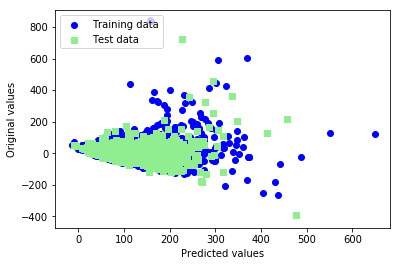

In [109]:
plt.scatter(y_train_pred, y_train - y_train_pred,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test-y_test_pred,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Original values')
plt.legend(loc='upper left')
plt.show()

In [138]:
#randomforest
rf = RandomForestRegressor(n_estimators = 140,
               min_samples_split=10,
 min_samples_leaf=4,
 max_features=None,
 max_depth= 46,
 bootstrap=True)
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=46,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [139]:
 
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 2818.771, test: 3535.274
R^2 train: 0.664, test: 0.520


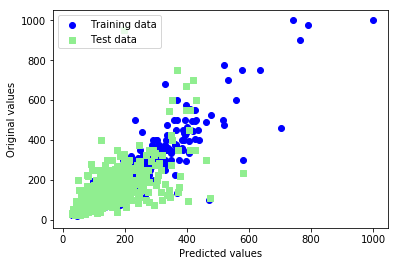

In [124]:
plt.scatter(y_train_pred, y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Original values')
plt.legend(loc='upper left')
plt.show()

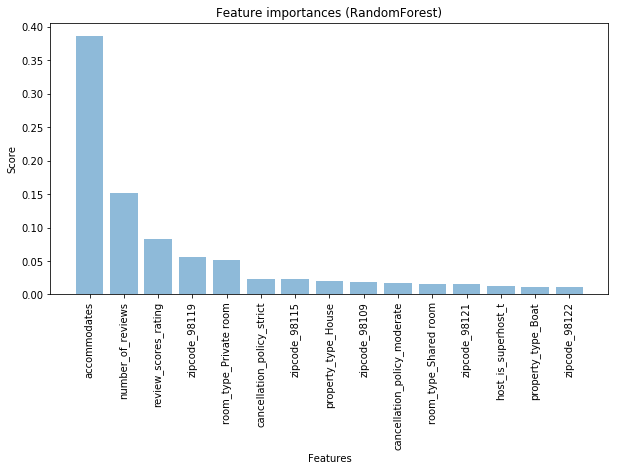

In [125]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x: x[1] * -1)
rf_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances for top 15 features
features = rf_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = rf_feature_importances['score'][:15]
 
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (RandomForest)')

 
 
plt.show()

In [149]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None],
 'max_features': ['auto', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [157]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', None], 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [158]:
rf_random.best_params_

{'n_estimators': 157,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 46,
 'bootstrap': True}

In [160]:
def evaluate(model, X,y):
    predictions = model.predict(X)
    errors = abs(predictions - y)
    mape = 100 * np.mean(errors / y)
    accuracy = 100 - mape
    r2 = r2_score(y,predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('R-square = {:0.2f}%.'.format(r2))
    return accuracy, r2

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train,y_train)
(base_accuracy,base_r2) = evaluate(base_model,X_test,y_test)
y_test_pred = base_model.predict(X_test)
 
 
best_random = rf_random.best_estimator_
(random_accuracy,random_r2) = evaluate(best_random,X_test,y_test)
y_test_pred = best_random.predict(X_test)
 
 
print('Improvement of accuracy: {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
print('Improvement of R-square {:0.2f}%.'.format( 100 * (random_r2 - base_r2) / base_r2))
 

Model Performance
Average Error: 37.8912 degrees.
Accuracy = 68.63%.
R-square = 0.44%.
Model Performance
Average Error: 35.6542 degrees.
Accuracy = 70.14%.
R-square = 0.53%.
Improvement of accuracy: 2.20%.
Improvement of R-square 19.48%.


The randomsearch crossvalidation shows better result than the base model.  